# What makes people happy?
___


The World Happiness Report is a survey of the state of global happiness. The happiness scores (0-10) are based on answers to the main life evaluation question asked in the poll.

Happiness Score Columns:

* GDP per Capita
* Family - Sociall Support
* Life Expectancy
* Freedom
* Generosity
* Trust Government Corruption
* Distopya Residual Metric (Dystopia Happiness Score (1.85) + Residual Value

If we add all these factors up, we will get the happiness score so it might be un-reliable to model them to predict Hapiness Scores.

For more information about the Report or the Dataset, click [here](https://www.kaggle.com/unsdsn/world-happiness).

Our **main goal** is to do an exploratory analysis of the factors that make people happy.

### Table of Contents

* [Read and understand the data](#Read-and-understand-the-data)
* [Correlation Analysis](#Correlation-Analysis)
* [PCA & Cluster Analysis](#PCA-&-Cluster-Analysis)
* [Clustering Map Analysis](#Clustering-Map-Analysis)
* [Country Analysis between 2015 and 2019](#Country-Analysis-between-2015-and-2019)

-------------------------------------------------------------------------------------------------------------------------
Part of the work done here was inspired by this post (http://rstudio-pubs-static.s3.amazonaws.com/509190_c443ce12703a487e8ba5f165aa687175.html)

# Read and understand the data
___

First of all, we are going to load the libraries that we're going to use in this analysis. 

In [1]:
# Libraries

library(tidyverse) # Tidyverse package for several uses (pipeline, charts, operations, etc.)
library(ggplot2) # For charts
library(factoextra) # Clustering
library(FactoMineR) # Clustering
library(heatmaply) # Heatmap chart
library(cluster) # Clustering
library(Hmisc) # To impute values
library(corrplot) # Correlation Analysis
library(GGally) 
library(repr)
library(ggrepel) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: plotly


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config


Loading required package: viridis

Loading required package: viridisLite


Welcome to heatmaply version 1.1.1

Type citation('heatmaply') for how to cite the package.
Type ?heatmaply for

In [2]:
# For the plots size
options(repr.plot.width = 10, repr.plot.height = 8)

___
Then, we are going to read the reports from the last two years available: 2018, 2019.

In [3]:
# Read the data
data_2019 <- read_csv("../input/world-happiness/2019.csv") %>%
    as.data.frame()
data_2018 <- read_csv("../input/world-happiness/2018.csv") %>%
    as.data.frame()


── Column specification ────────────────────────────────────────────────────────
cols(
  `Overall rank` = col_double(),
  `Country or region` = col_character(),
  Score = col_double(),
  `GDP per capita` = col_double(),
  `Social support` = col_double(),
  `Healthy life expectancy` = col_double(),
  `Freedom to make life choices` = col_double(),
  Generosity = col_double(),
  `Perceptions of corruption` = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  `Overall rank` = col_double(),
  `Country or region` = col_character(),
  Score = col_double(),
  `GDP per capita` = col_double(),
  `Social support` = col_double(),
  `Healthy life expectancy` = col_double(),
  `Freedom to make life choices` = col_double(),
  Generosity = col_double(),
  `Perceptions of corruption` = col_character()
)




### Dataset Analysis
___
Now, we will do a first approach to the data: Data Types, Missing Values, possible Outliers, etc.

In [4]:
# Summary Analysis

head(data_2019, 3)
head(data_2018, 3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
2,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
3,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [5]:
# Is it necessary to do a Data Cleaning?
print("2019 Data")
summary(data_2019)

print("2018 Data")
summary(data_2018)

[1] "2019 Data"


  Overall rank    Country or region      Score       GDP per capita  
 Min.   :  1.00   Length:156         Min.   :2.853   Min.   :0.0000  
 1st Qu.: 39.75   Class :character   1st Qu.:4.545   1st Qu.:0.6028  
 Median : 78.50   Mode  :character   Median :5.380   Median :0.9600  
 Mean   : 78.50                      Mean   :5.407   Mean   :0.9051  
 3rd Qu.:117.25                      3rd Qu.:6.184   3rd Qu.:1.2325  
 Max.   :156.00                      Max.   :7.769   Max.   :1.6840  
 Social support  Healthy life expectancy Freedom to make life choices
 Min.   :0.000   Min.   :0.0000          Min.   :0.0000              
 1st Qu.:1.056   1st Qu.:0.5477          1st Qu.:0.3080              
 Median :1.272   Median :0.7890          Median :0.4170              
 Mean   :1.209   Mean   :0.7252          Mean   :0.3926              
 3rd Qu.:1.452   3rd Qu.:0.8818          3rd Qu.:0.5072              
 Max.   :1.624   Max.   :1.1410          Max.   :0.6310              
   Generosity     Pe

[1] "2018 Data"


  Overall rank    Country or region      Score       GDP per capita  
 Min.   :  1.00   Length:156         Min.   :2.905   Min.   :0.0000  
 1st Qu.: 39.75   Class :character   1st Qu.:4.454   1st Qu.:0.6162  
 Median : 78.50   Mode  :character   Median :5.378   Median :0.9495  
 Mean   : 78.50                      Mean   :5.376   Mean   :0.8914  
 3rd Qu.:117.25                      3rd Qu.:6.168   3rd Qu.:1.1978  
 Max.   :156.00                      Max.   :7.632   Max.   :2.0960  
 Social support  Healthy life expectancy Freedom to make life choices
 Min.   :0.000   Min.   :0.0000          Min.   :0.0000              
 1st Qu.:1.067   1st Qu.:0.4223          1st Qu.:0.3560              
 Median :1.255   Median :0.6440          Median :0.4870              
 Mean   :1.213   Mean   :0.5973          Mean   :0.4545              
 3rd Qu.:1.463   3rd Qu.:0.7772          3rd Qu.:0.5785              
 Max.   :1.644   Max.   :1.0300          Max.   :0.7240              
   Generosity     Pe

___
Looks like everything is correct... We'll take a look at the data types.

In [6]:
# Data types
str(data_2019)

'data.frame':	156 obs. of  9 variables:
 $ Overall rank                : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Country or region           : chr  "Finland" "Denmark" "Norway" "Iceland" ...
 $ Score                       : num  7.77 7.6 7.55 7.49 7.49 ...
 $ GDP per capita              : num  1.34 1.38 1.49 1.38 1.4 ...
 $ Social support              : num  1.59 1.57 1.58 1.62 1.52 ...
 $ Healthy life expectancy     : num  0.986 0.996 1.028 1.026 0.999 ...
 $ Freedom to make life choices: num  0.596 0.592 0.603 0.591 0.557 0.572 0.574 0.585 0.584 0.532 ...
 $ Generosity                  : num  0.153 0.252 0.271 0.354 0.322 0.263 0.267 0.33 0.285 0.244 ...
 $ Perceptions of corruption   : num  0.393 0.41 0.341 0.118 0.298 0.343 0.373 0.38 0.308 0.226 ...
 - attr(*, "spec")=
  .. cols(
  ..   `Overall rank` = col_double(),
  ..   `Country or region` = col_character(),
  ..   Score = col_double(),
  ..   `GDP per capita` = col_double(),
  ..   `Social support` = col_double(),
  ..   `Healthy li

In [7]:
str(data_2018)

'data.frame':	156 obs. of  9 variables:
 $ Overall rank                : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Country or region           : chr  "Finland" "Norway" "Denmark" "Iceland" ...
 $ Score                       : num  7.63 7.59 7.55 7.5 7.49 ...
 $ GDP per capita              : num  1.3 1.46 1.35 1.34 1.42 ...
 $ Social support              : num  1.59 1.58 1.59 1.64 1.55 ...
 $ Healthy life expectancy     : num  0.874 0.861 0.868 0.914 0.927 0.878 0.896 0.876 0.913 0.91 ...
 $ Freedom to make life choices: num  0.681 0.686 0.683 0.677 0.66 0.638 0.653 0.669 0.659 0.647 ...
 $ Generosity                  : num  0.202 0.286 0.284 0.353 0.256 0.333 0.321 0.365 0.285 0.361 ...
 $ Perceptions of corruption   : chr  "0.393" "0.340" "0.408" "0.138" ...
 - attr(*, "spec")=
  .. cols(
  ..   `Overall rank` = col_double(),
  ..   `Country or region` = col_character(),
  ..   Score = col_double(),
  ..   `GDP per capita` = col_double(),
  ..   `Social support` = col_double(),
  ..   `Healthy

Perception of corruption is chr type and it should be dbl.

In [8]:
# Change Data Type

data_2018$`Perceptions of corruption` <- as.numeric(data_2018$`Perceptions of corruption`)
data_2019$`Perceptions of corruption` <- as.numeric(data_2019$`Perceptions of corruption`)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [9]:
# We will focus on imputing the median value for corruption in the NA value introduced by the function above

data_2018$`Perceptions of corruption`<- with(data_2018, impute(`Perceptions of corruption`, median))
data_2019$`Perceptions of corruption`<- with(data_2019, impute(`Perceptions of corruption`, median))

In [10]:
# Update the rownames as the country name
#row.names(data_2019) <- data_2019$`Country or region`
#row.names(data_2018) <- data_2018$`Country or region`

In [11]:
data_2019$`Overall rank` <- NULL

# Correlation Analysis
___
Now, we could focus on understanding the possible relations between the data. We are going to focus (for now) in the 2019 data.

First, we will respond to the question: **What's the variables that drive a higher happiness Score?** To do so, we will do a **correlation analysis**.

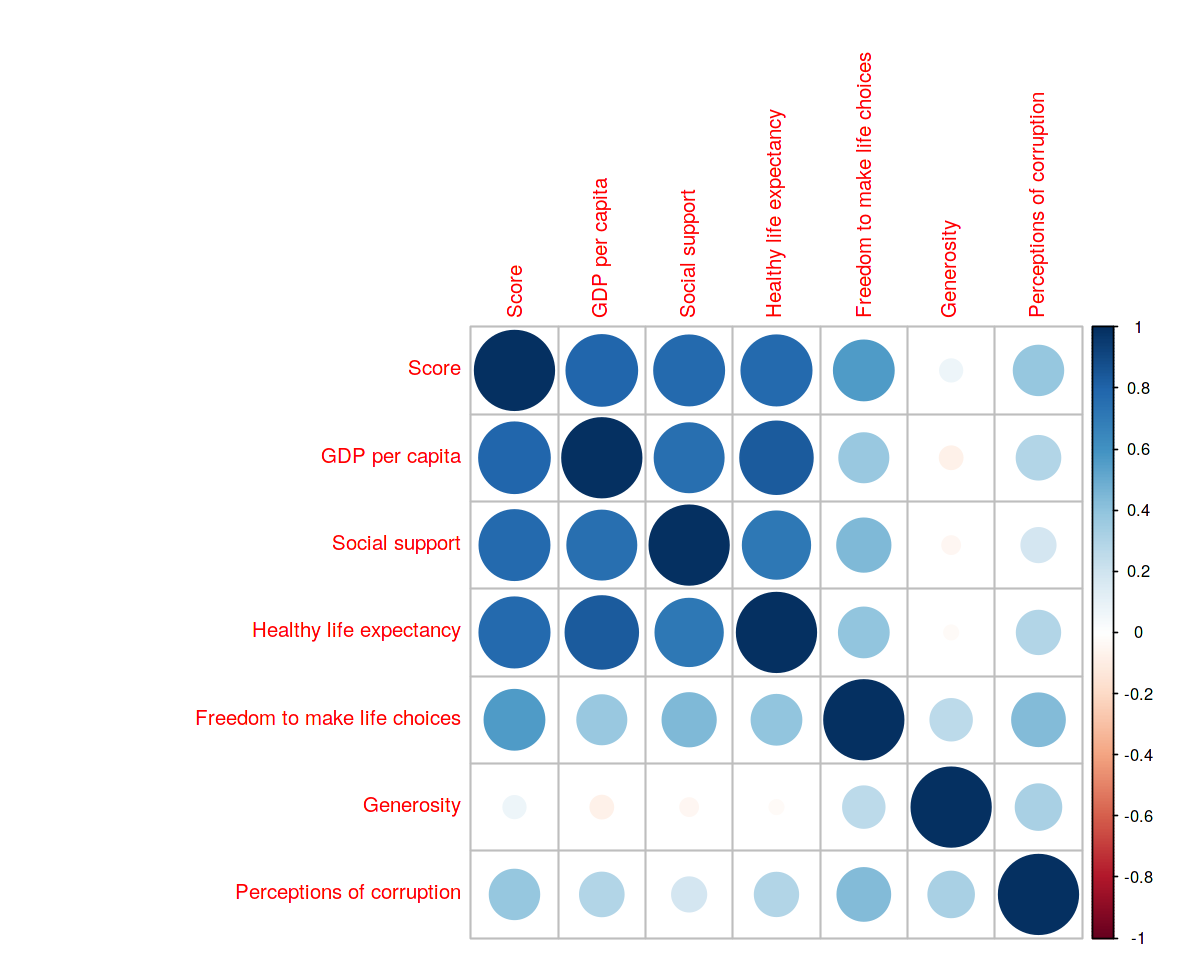

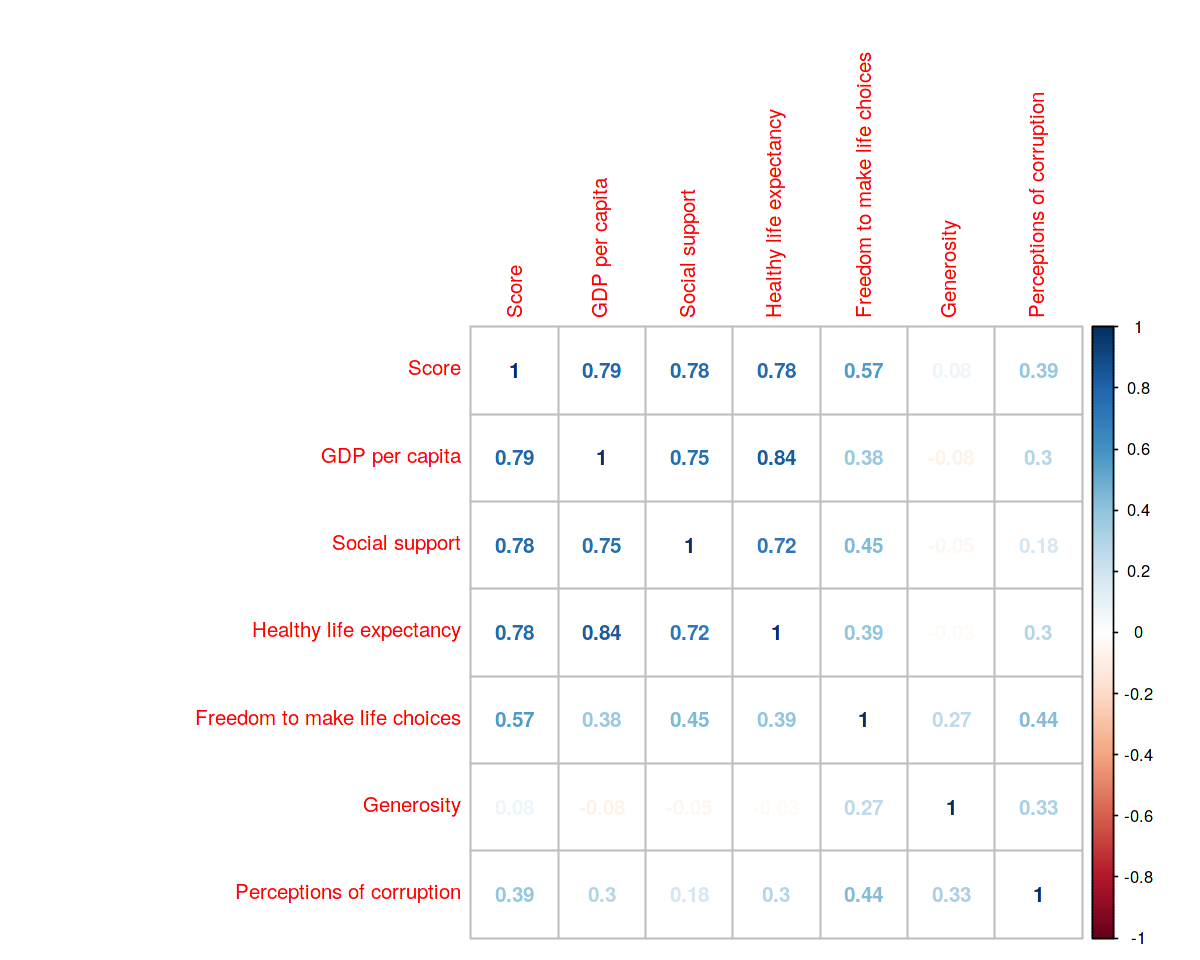

In [12]:
# correlation

cor_2019 <- cor(data_2019[,-1])

corrplot(cor_2019, method = "circle")
corrplot(cor_2019, method = "number")

___
From the above charts, we can obtain the following conclusions:

1. **The Happiness Score is highly** related with the **GDP per Capita, Social Support and Healthy Life Expectancy**.
1. **The Happines Score is NOT related at all with the Generosity Variable**, which is (in my opinion) a surprise. 
1. We can see that in countries with High Level of GDP, they will have a High Life Expectancy and Family Support. So... **Rich Countries will be the Happiest, live longer and have more family support.**

So, as a first conclusion, we could say that the **Happiest Countries will be the ones with higher GDP per capita, Social Support and Life Expectancy and the other way around**

# PCA & Cluster Analysis
___
As we saw, it exists a correlation between different inputs variables. We are going to do a PCA analysis in order to confirm the linear relationship among the input variables.

To do this analysis, we'll continue to use the 2019 data.

In [13]:
head(data_2019)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


### PCA Analysis
___

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.9895919,49.826532,49.82653
Dim.2,1.4256031,23.760052,73.58658
Dim.3,0.6098512,10.164186,83.75077
Dim.4,0.5562727,9.271212,93.02198
Dim.5,0.2613235,4.355392,97.37737
Dim.6,0.1573576,2.622626,100.00000


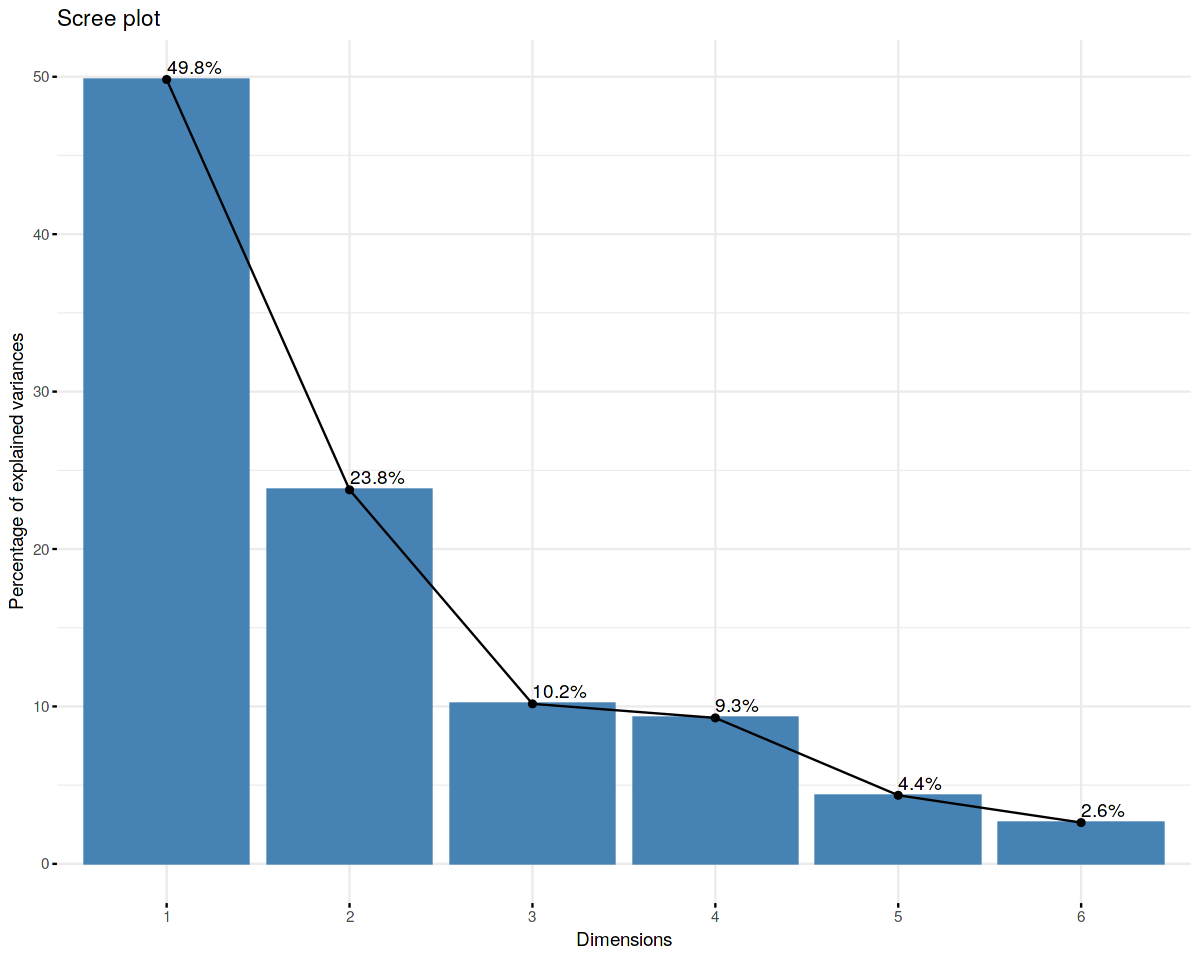

In [14]:
# PCA

fit <- PCA(data_2019[,-(1:2)], scale.unit = TRUE, ncp = 7, graph = FALSE)
(eig <- get_eigenvalue(fit))
fviz_eig(fit, addlabels = TRUE)

___
We will choose three PCAs because with three PCAs we will explain ~ 83 % of the variables variance.


In [15]:
# New PCAs analysis (3)

fit2 <- PCA(data_2019[,-(1:2)], scale.unit = TRUE, ncp = 3, graph = FALSE)

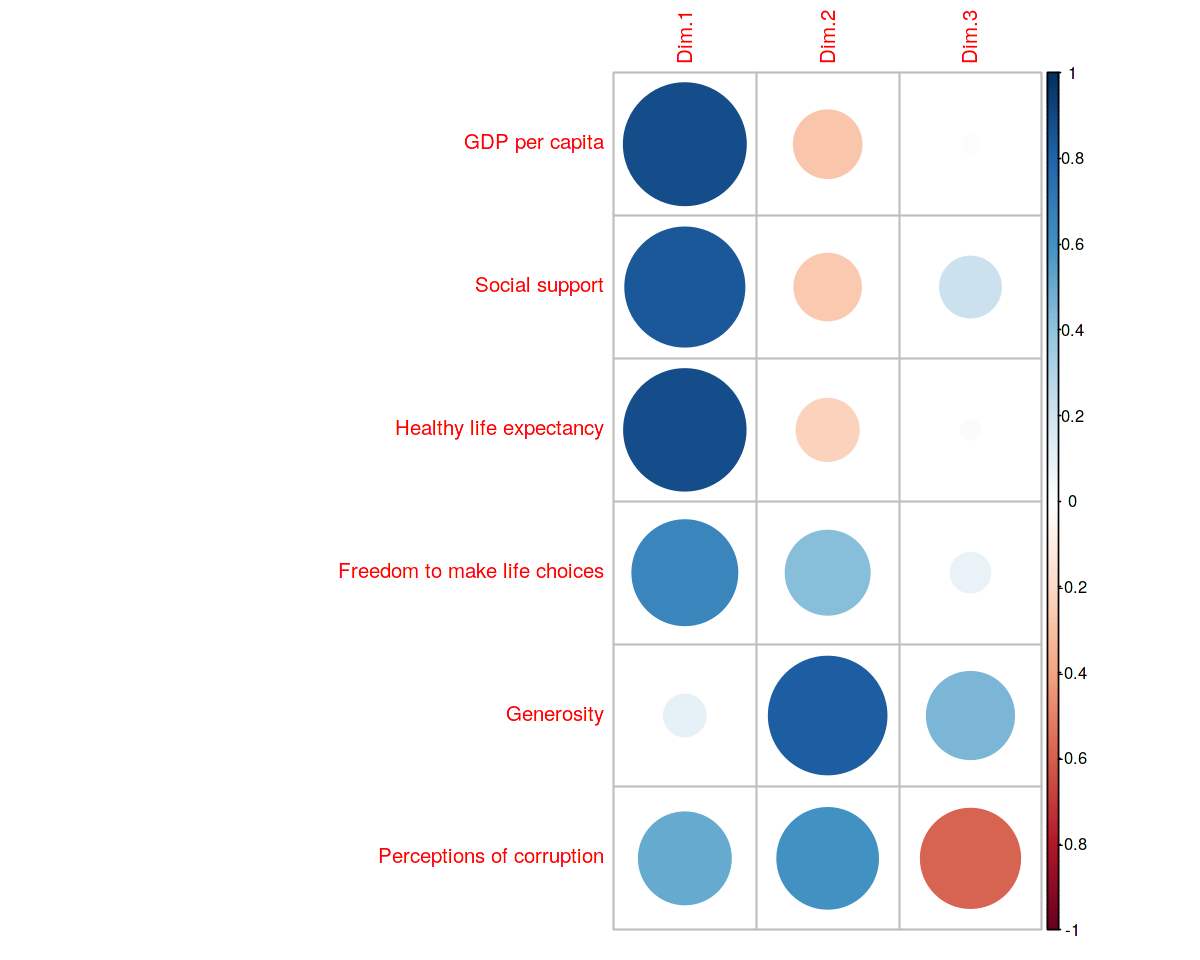

In [16]:
# Correlation between PCA and Variables
var <- get_pca_var(fit2)
corrplot::corrplot(var$cor)

___
Conclusions: 

* PCA1: High-Direct Correlated with GDP, Social Support, Healthy Life Expectancy and Freedom of choice. Less with Corruption. So, due to the correlation of this variables with the Happiness Score, we will say that this dimension will refer to the Happiest Countries.
* PC2: Direct Correlated with Generosity & Corruption.
* PC3: Inverse Correlated with Corruption

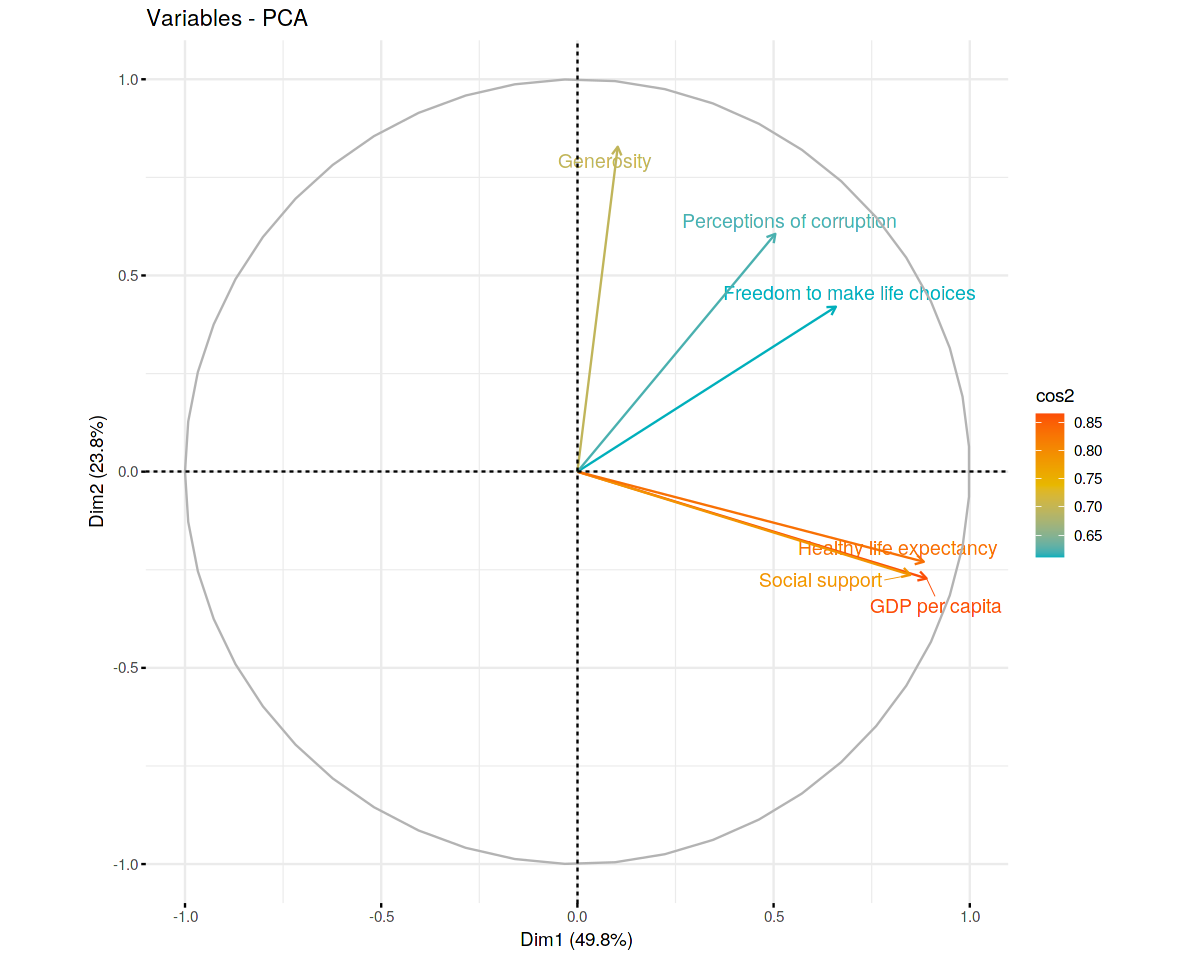

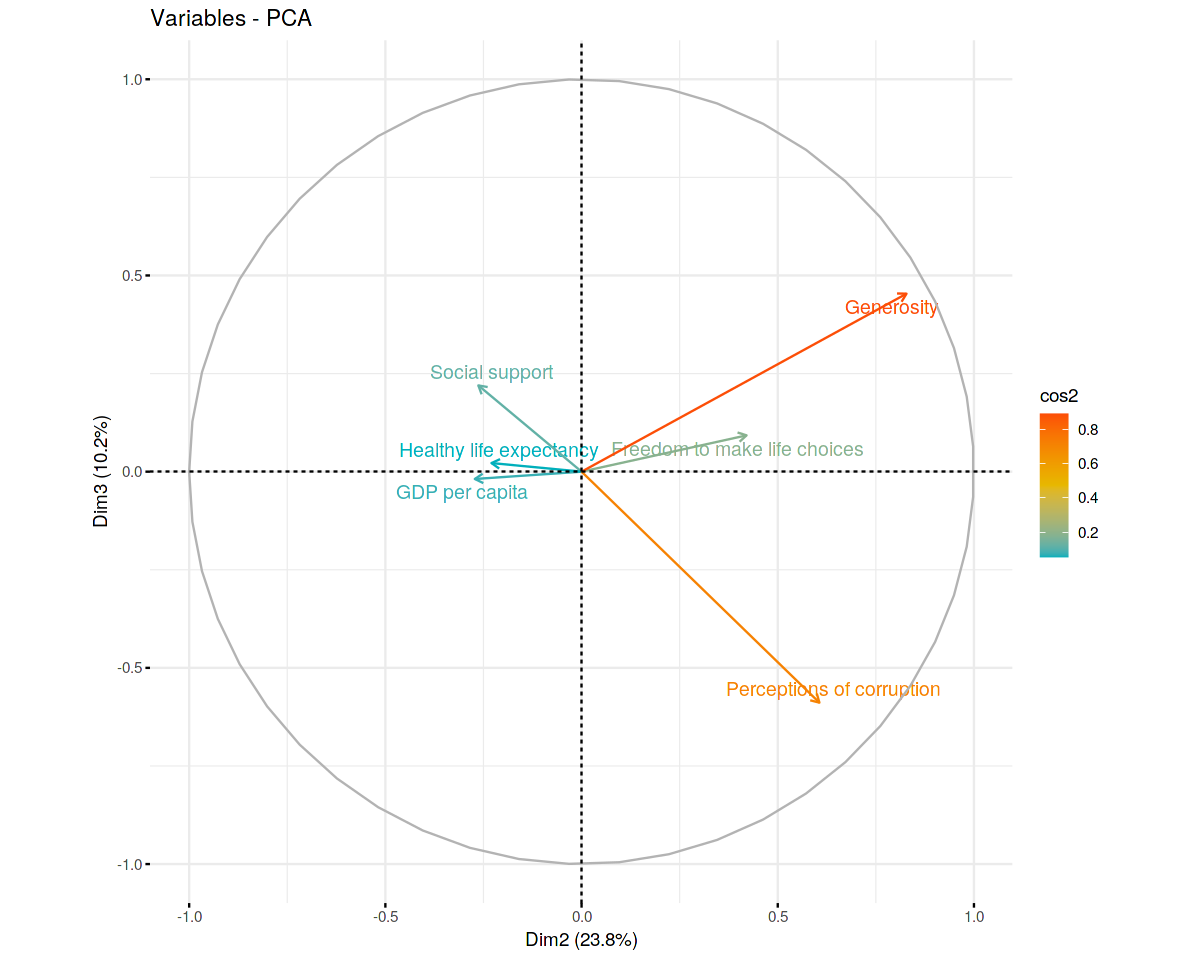

In [17]:
# Charts
fviz_pca_var(fit2, axes = c(1,2) ,col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
fviz_pca_var(fit2, axes = c(2,3) ,col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)


### Cluster Analysis
___
We are going to do an Cluster Analysis using the k-means method.

In [18]:
# set.seed will let us to repeat the clustering anytime with the same results
set.seed(1234)

In [19]:
#Standarized the data
data_ST <- scale(data_2019[,-(1:2)])
d_ST <- dist(data_ST, method = "euclidean")

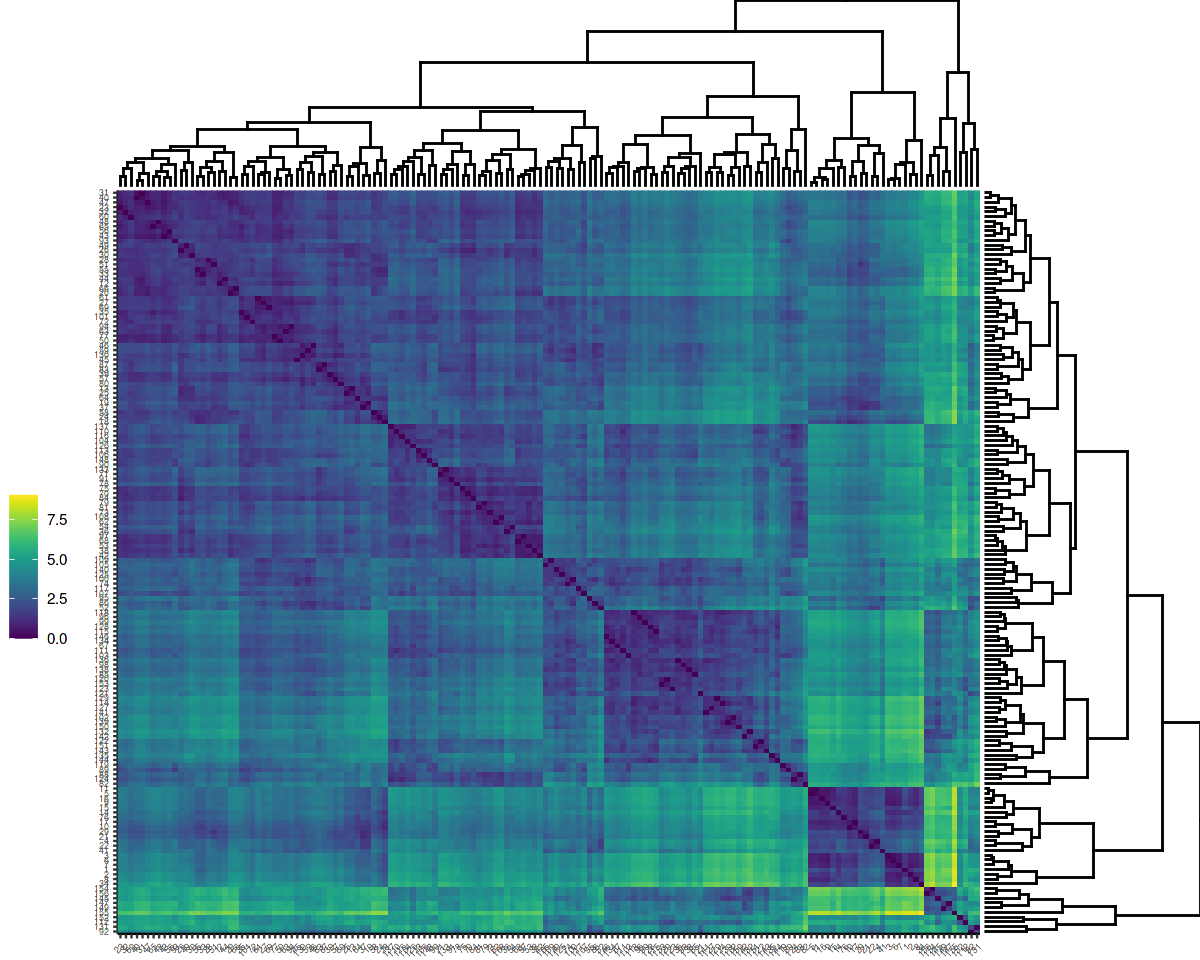

In [20]:
#GGHEATMAP
ggheatmap(as.matrix(d_ST), seriate = "mean", cexRow = 0.5, cexCol = 0.5)

___
Despite the difficulties to appreciate the countries name, we can see that there are different groups. We will use the Silhouette and the Elbow Methods to find out which is the correct cluster's number.

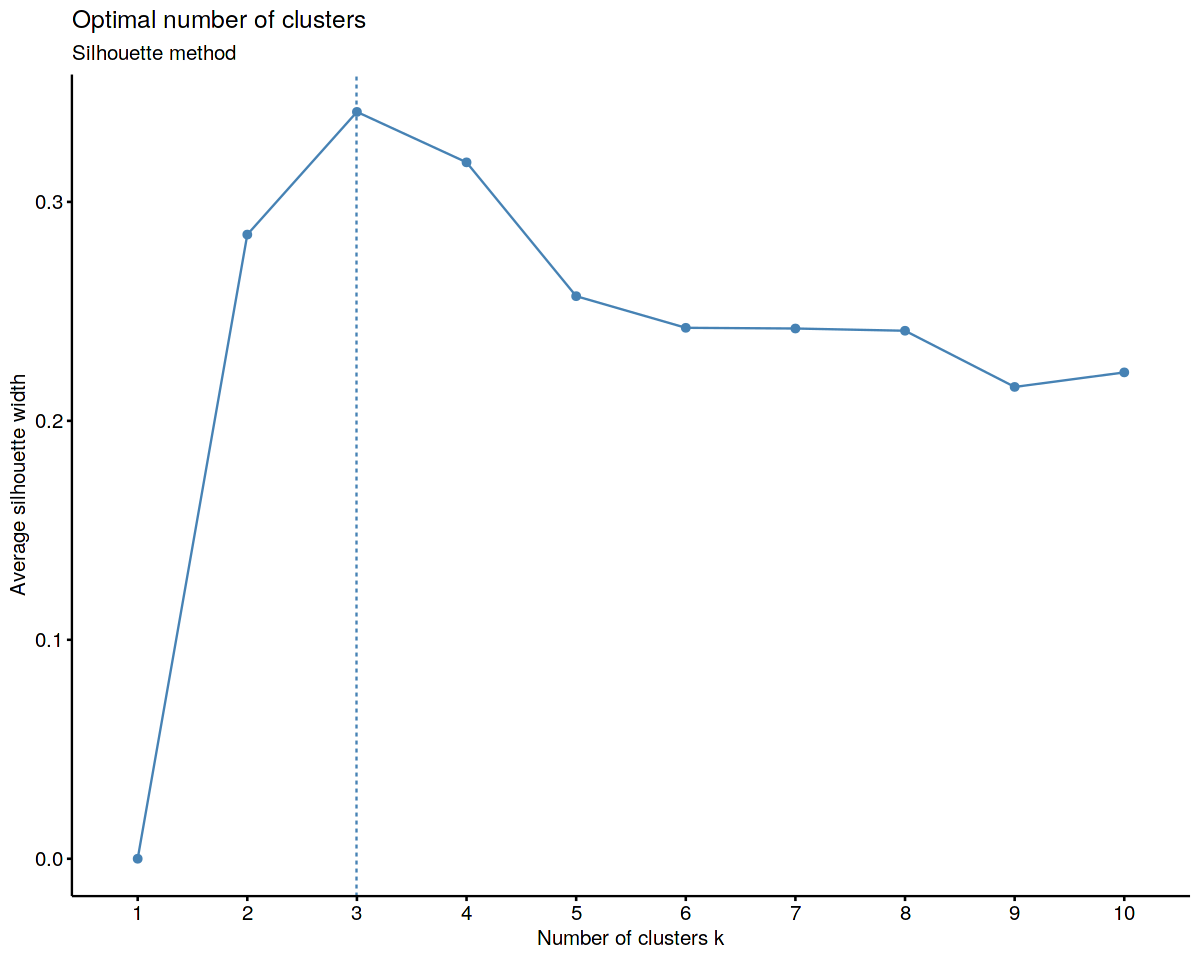

In [21]:
fviz_nbclust(data_ST, kmeans, method = "silhouette")+
    labs(subtitle = "Silhouette method") # 3 Clusteres

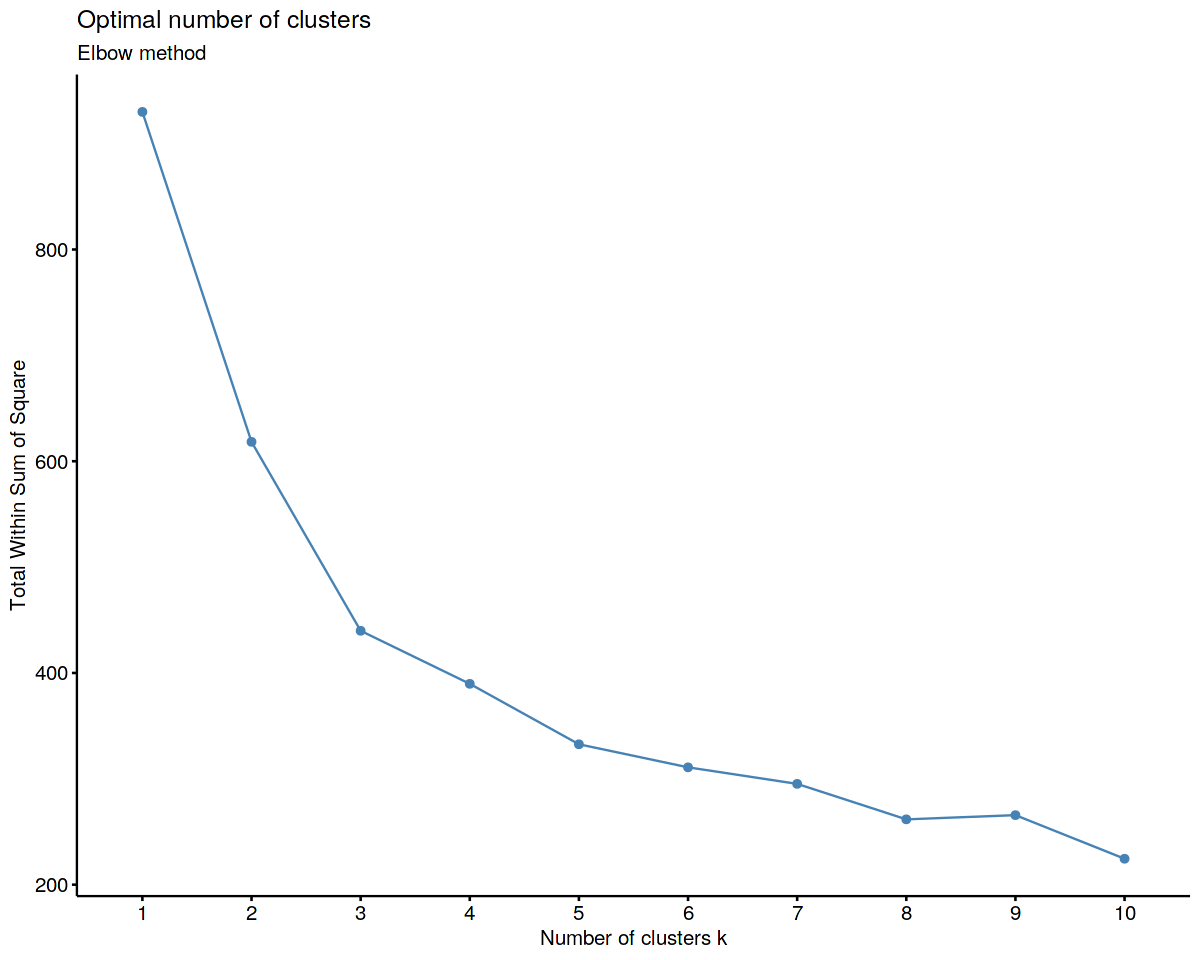

In [22]:
fviz_nbclust(data_ST, kmeans, method = "wss")+
    labs(subtitle = "Elbow method")

The first method (Silhouette) suggests to use only three clusters. However, from my point of view, dividing 156 countries in to three groups is not enough to appreciate the discrepancies among countries. We will use four groups (clusters) to do the analysis.

In [23]:
# K-MEANS
set.seed(1234)
countries <- kmeans(data_ST, 4)

  cluster size ave.sil.width
1       1   22          0.47
2       2   30          0.15
3       3   40          0.29
4       4   64          0.26


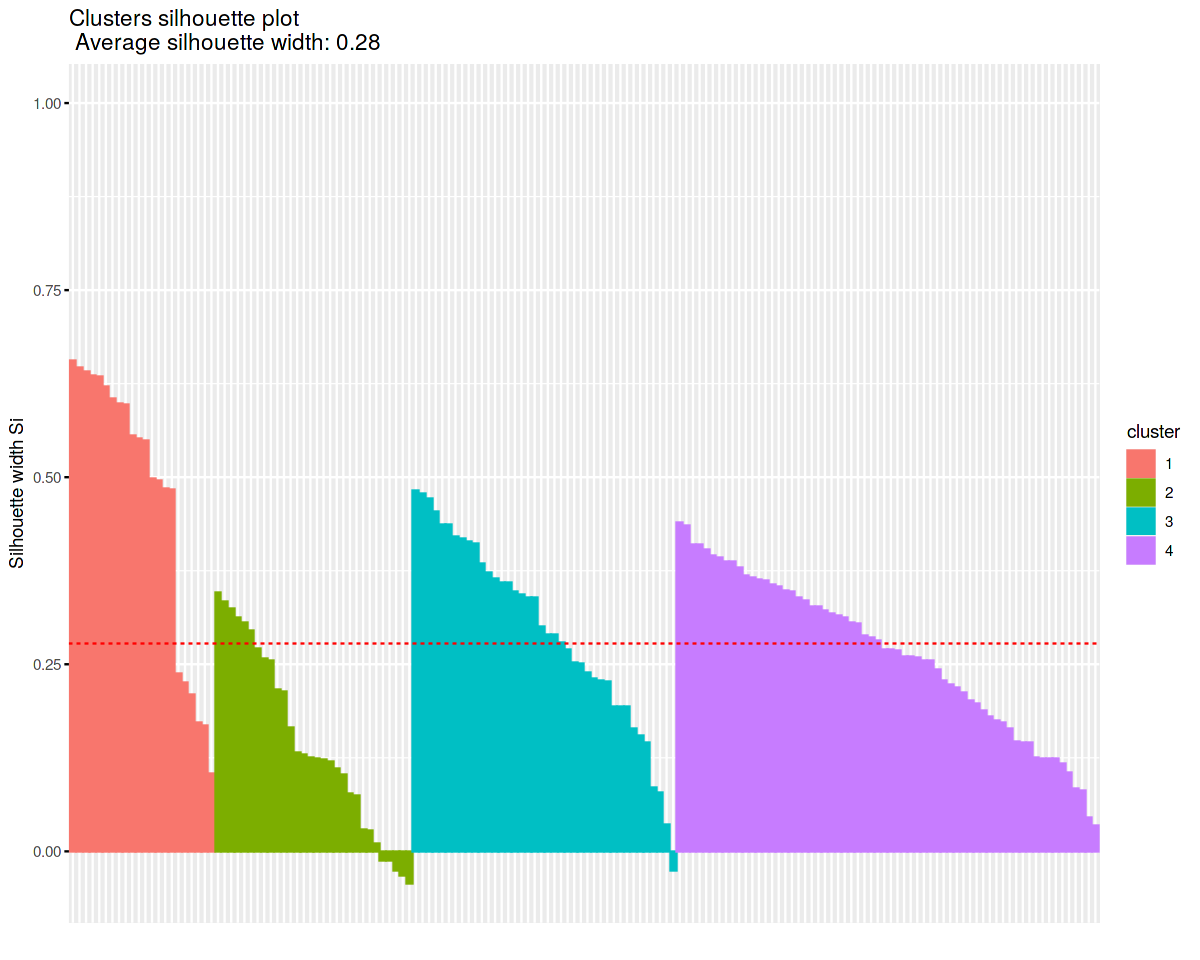

In [24]:
# Cluster Quality
sil <- silhouette(countries$cluster, dist(data_ST))
rownames(sil) <- rownames(data)
fviz_silhouette(sil)

___
The above plot help us to identify if there are observations (in this case, countries) that are not correct classified in each cluster. If the observation is closer to 1, it will indicate that the country is well classified. On the other hand, if the country has a negative value, it will mean that the country will be better classified in another group. 

In our case, most of the countries are well grouped.

In [25]:
countries1 <- data_2019
countries1$cluster <- as.factor(countries$cluster) # We will include in our data a column with the cluster group

head(countries1,3)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1


### What is the Score Values in each Cluster?
___

In [26]:
countries_avg <- countries1 %>%
    group_by(cluster) %>%
    summarize_if(is.numeric, mean, na.rm = TRUE)

countries_avg[,1:2]

cluster,Score
<fct>,<dbl>
1,7.029591
2,5.468467
3,4.181675
4,5.586484


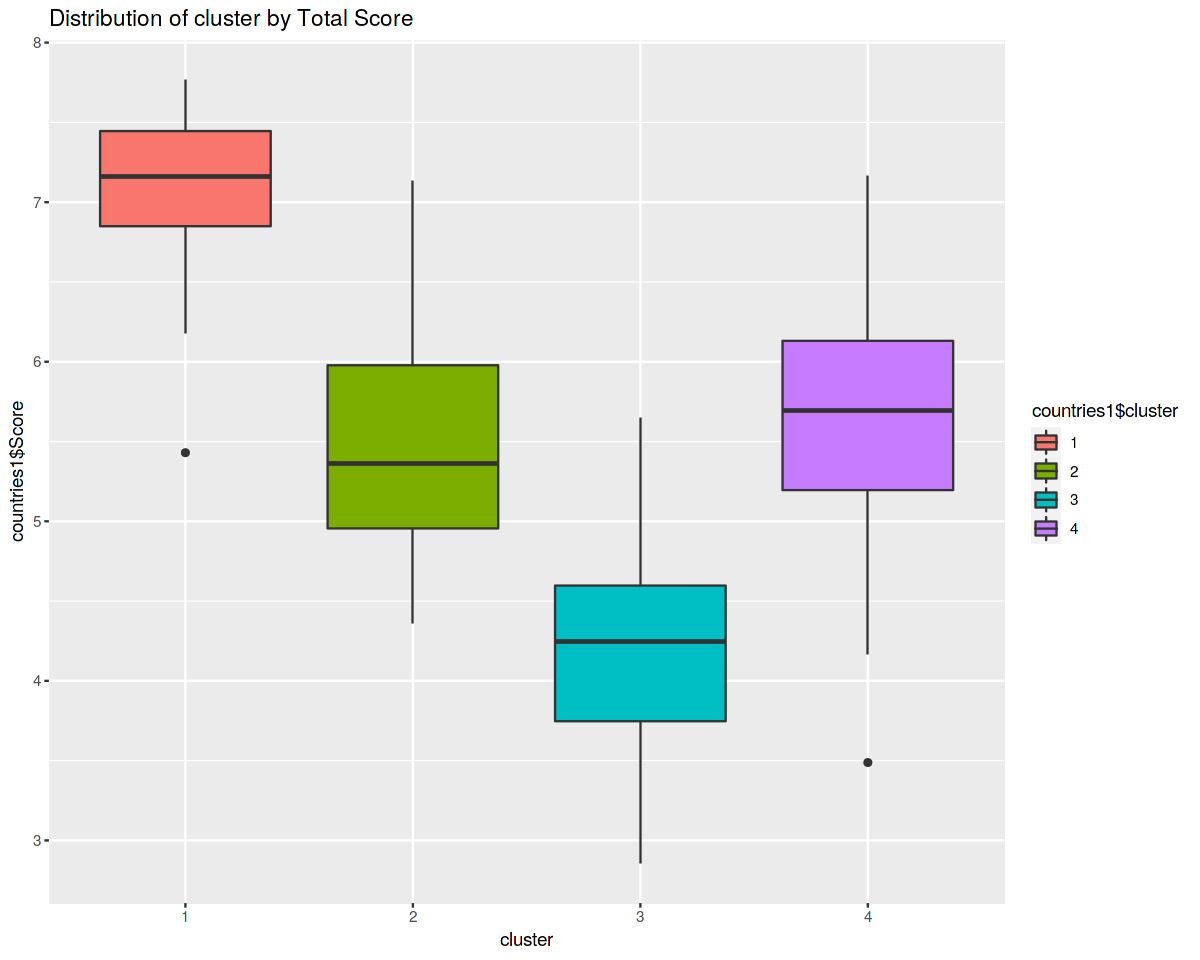

In [27]:
ggplot(countries1, aes(x=cluster, y= countries1$Score,fill = countries1$cluster)) + 
    geom_boxplot() + ggtitle('Distribution of cluster by Total Score')

___
As we can see, the happiest countries will be in the cluster 1. Meanwhile, on the other hand, we will have the countries in the cluster 3.

We will plot the different values to see the diference among clusters and variables.

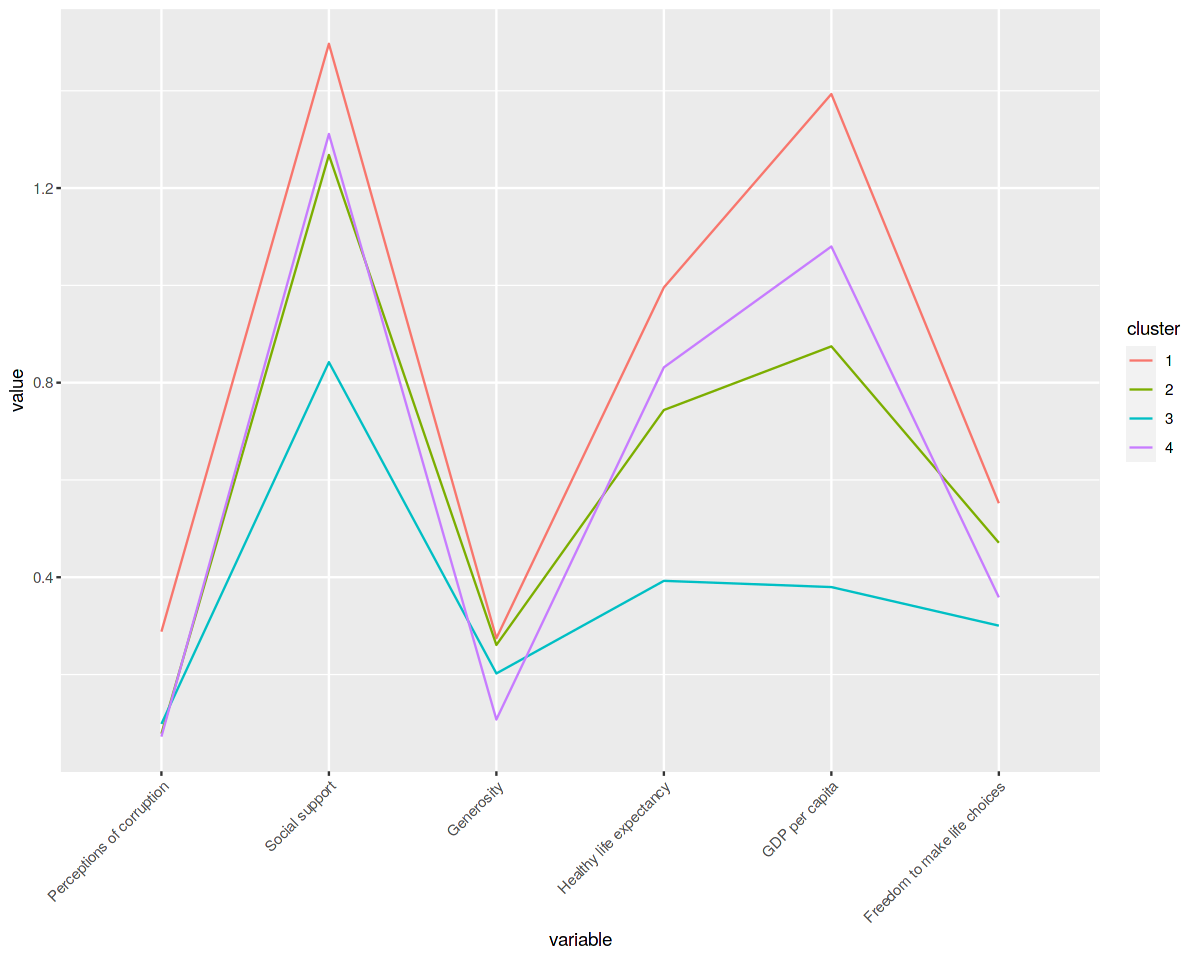

In [28]:
ggparcoord(countries_avg, columns = c(3:8), 
           groupColumn = "cluster", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) 

___
From the above plot, we can consider that the bigger differences in the variables among clusters (and countries) are in the variables GDP per Capita, Social Support and Life Exp. 

We will analyze these differences using box-plot charts

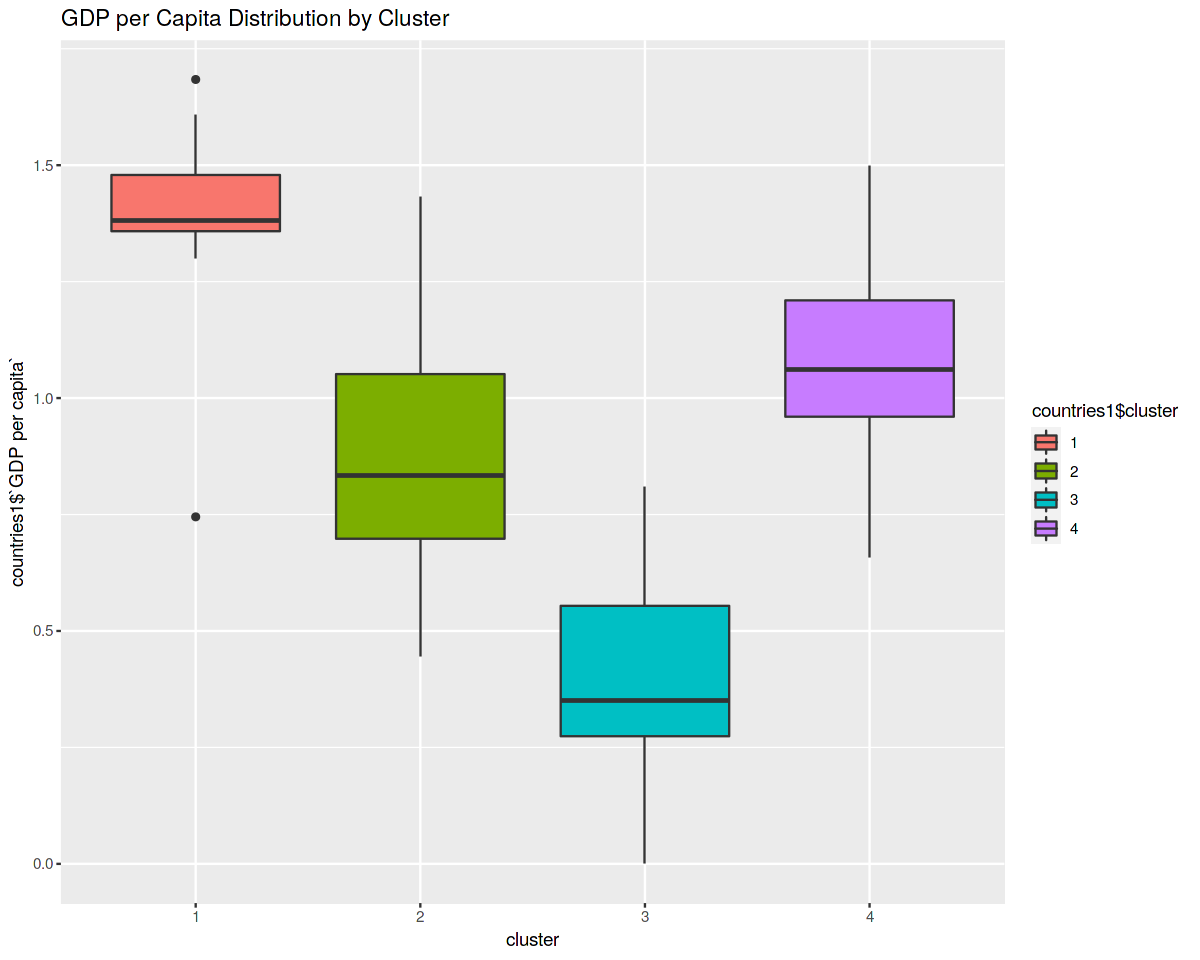

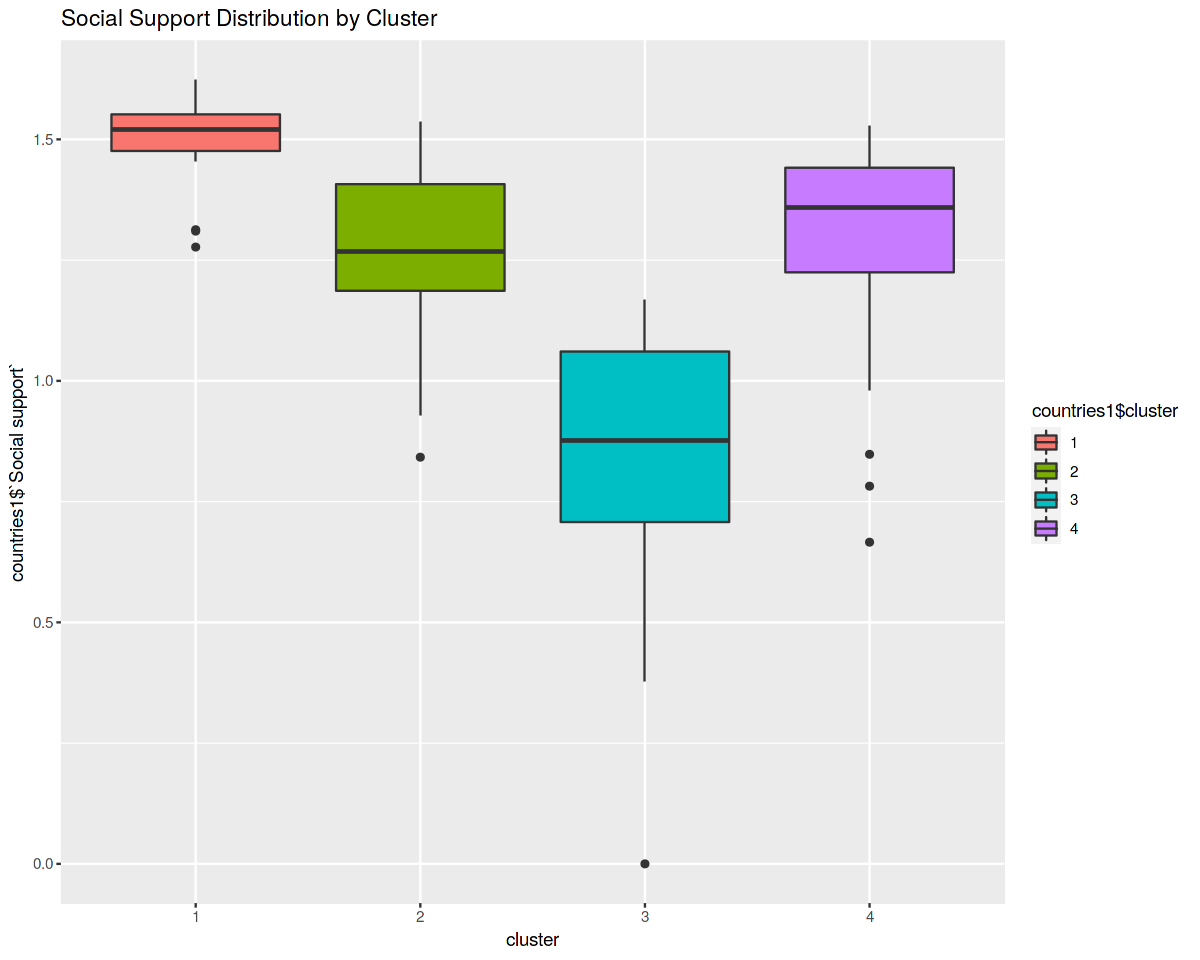

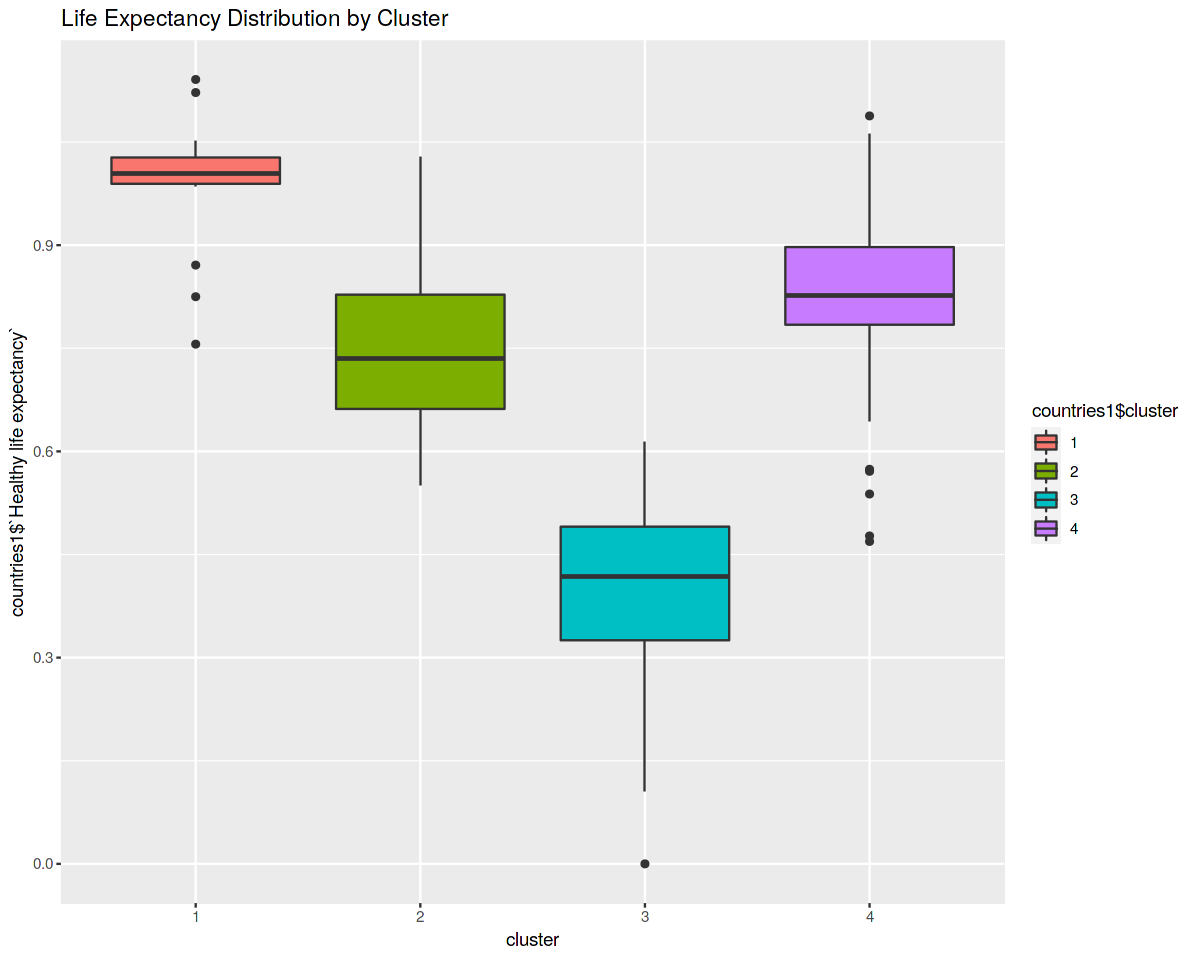

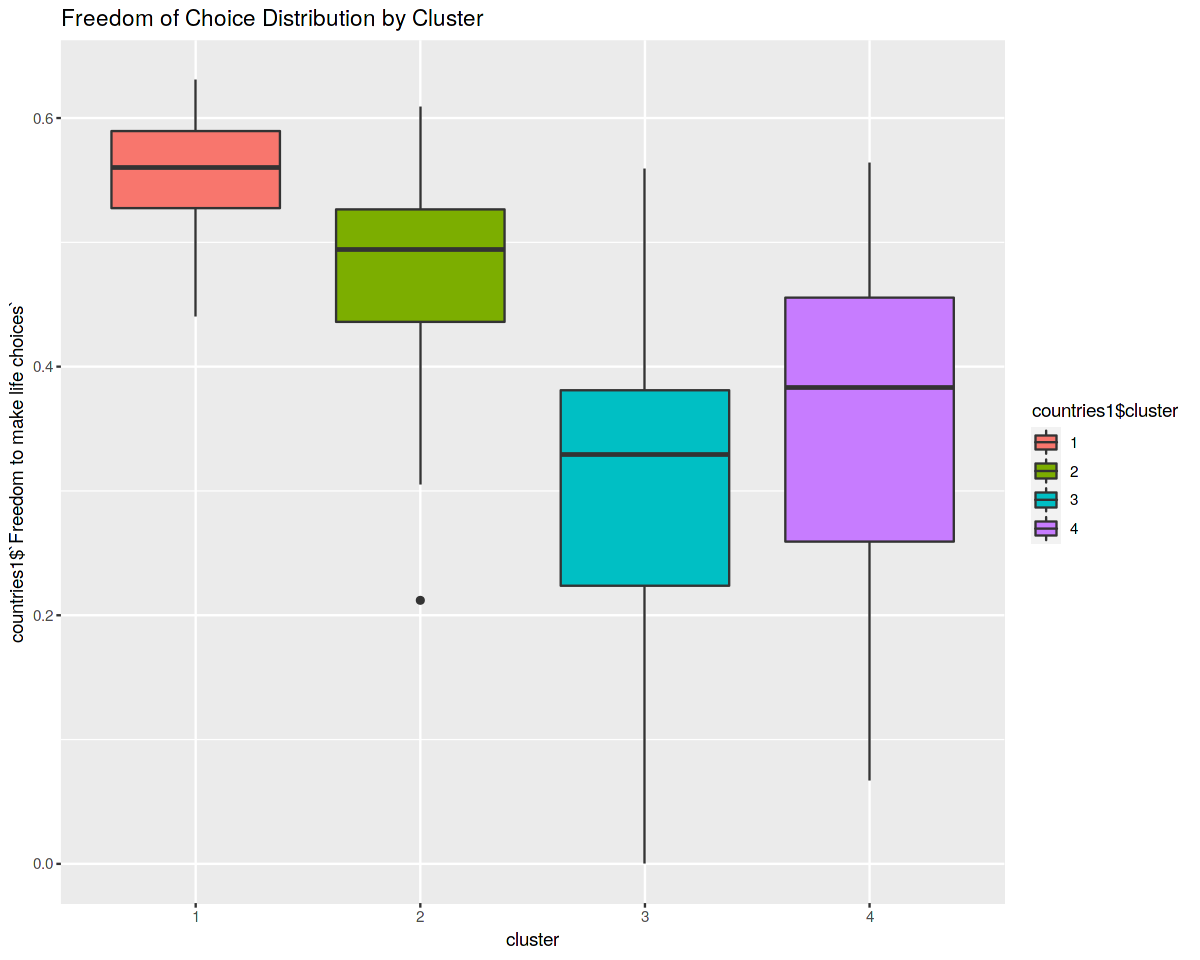

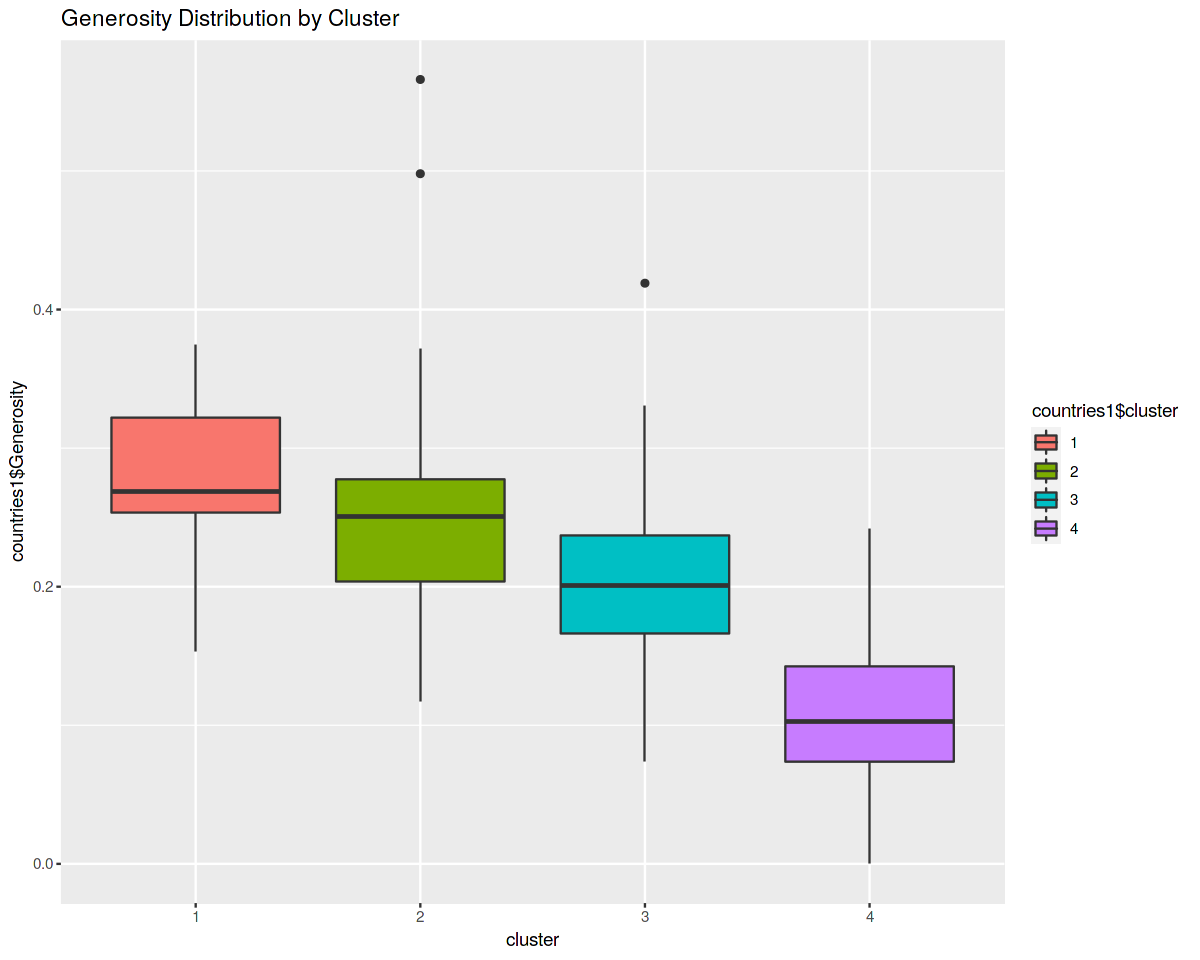

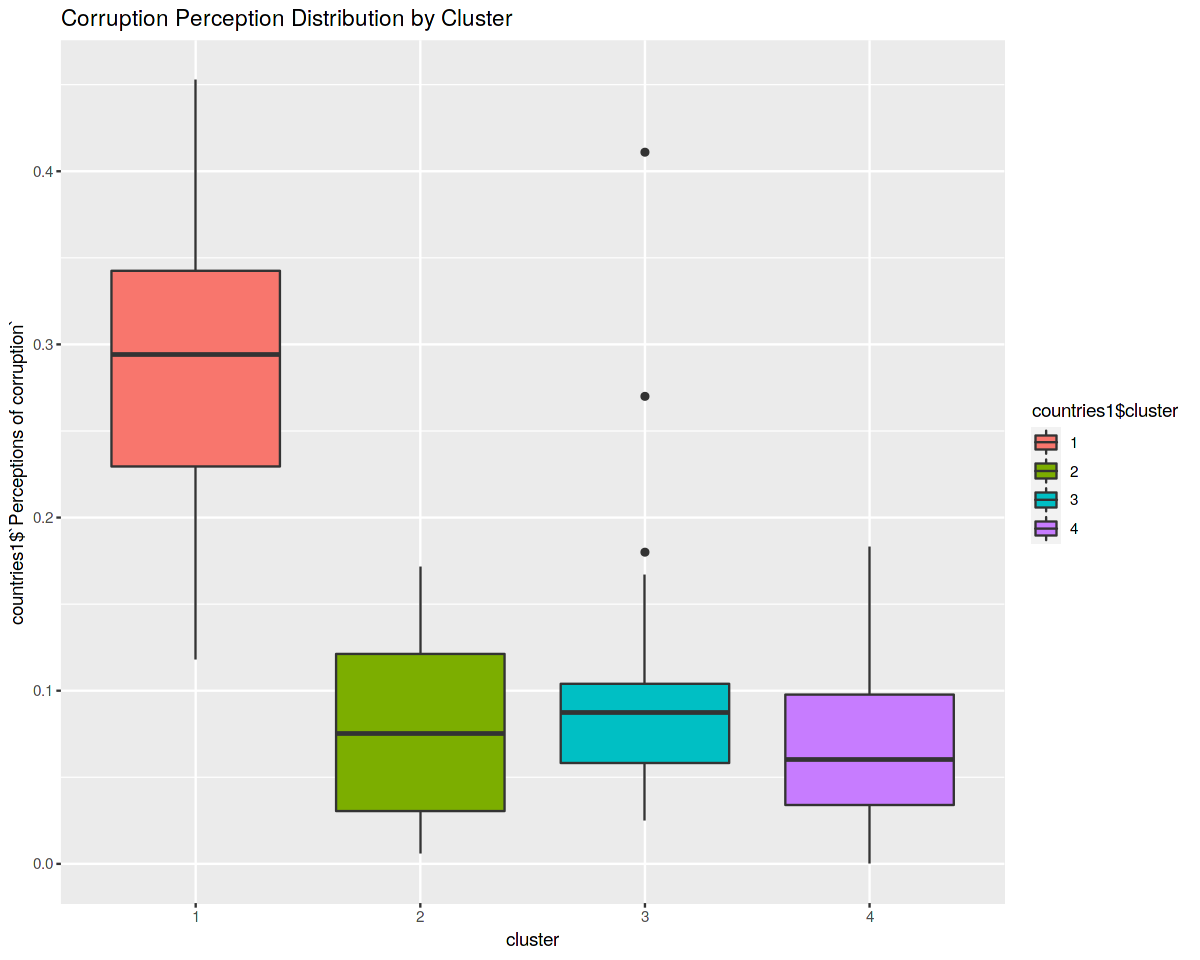

In [29]:
# GDP Per Capita
ggplot(countries1, aes(x=cluster, y= countries1$`GDP per capita`,fill = countries1$cluster)) + 
    geom_boxplot() + ggtitle('GDP per Capita Distribution by Cluster')

# Social Support
ggplot(countries1, aes(x=cluster, y= countries1$`Social support`,fill = countries1$cluster)) + 
    geom_boxplot() + ggtitle('Social Support Distribution by Cluster')


# Life Expectancy
ggplot(countries1, aes(x=cluster, y= countries1$`Healthy life expectancy`,fill = countries1$cluster)) + 
    geom_boxplot() + ggtitle('Life Expectancy Distribution by Cluster')

# Freedom of Choice
ggplot(countries1, aes(x=cluster, y= countries1$`Freedom to make life choices`,fill = countries1$cluster)) + 
    geom_boxplot() + ggtitle('Freedom of Choice Distribution by Cluster')

# Generosity
ggplot(countries1, aes(x=cluster, y= countries1$Generosity,fill = countries1$cluster)) + 
    geom_boxplot() + ggtitle('Generosity Distribution by Cluster')

# Corruption
ggplot(countries1, aes(x=cluster, y= countries1$`Perceptions of corruption`,fill = countries1$cluster)) + 
    geom_boxplot() + ggtitle('Corruption Perception Distribution by Cluster')

___

So we can see that the bigger difference between the happiest and the least happy countries are in the GDP per capita variable, as well as Social Support and Life Expectancy. In the Generosity Variable, all countries have a similar Score, which indicates that (always from my point of view) it is not a good indicator of the happiness in a country.

In [30]:
# Top 10 Countries ordered by Score in Cluster 1 (The one with happiest countries)
countries1 %>% 
    filter(cluster == 1)  %>%
    select('Country or region', 'Score')%>%
    head(10)

,Country or region,Score
,<chr>,<dbl>
1,Finland,7.769
2,Denmark,7.600
3,Norway,7.554
4,Iceland,7.494
5,Netherlands,7.488
6,Switzerland,7.480
7,Sweden,7.343
8,New Zealand,7.307
9,Canada,7.278


The Least Happiest Countries in 2019 were: 

In [31]:
# Top 10 Countries ordered by Score in Cluster 3 (The one with least happiest countries)
countries1 %>% 
    filter(cluster == 3)  %>%
    select('Country or region', 'Score') %>%
    head(10)

rownames(countries1) <- countries1$`Country or region`

,Country or region,Score
,<chr>,<dbl>
1,Pakistan,5.653
2,Nigeria,5.265
3,Cameroon,5.044
4,Ghana,4.996
5,Ivory Coast,4.944
6,Benin,4.883
7,Congo (Brazzaville),4.812
8,Senegal,4.681
9,Somalia,4.668


# Country Analysis between 2015 and 2019
___

Based on the variables that we know that represents the main changes in the happiness score (GDP per Capita, Life Expectancy and Social Support), we will represent 5 countries from the Cluster 1, to see in they changed positions based on some of this variables.

To do this comparison, we will read the 2015 to study the changes in a 5 year periodo.

In [32]:
data_2015 <- read_csv("../input/world-happiness/2015.csv") %>%
    as.data.frame()
data_2016 <- read_csv("../input/world-happiness/2016.csv") %>%
    as.data.frame()
data_2017 <- read_csv("../input/world-happiness/2017.csv") %>%
    as.data.frame()


── Column specification ────────────────────────────────────────────────────────
cols(
  Country = col_character(),
  Region = col_character(),
  `Happiness Rank` = col_double(),
  `Happiness Score` = col_double(),
  `Standard Error` = col_double(),
  `Economy (GDP per Capita)` = col_double(),
  Family = col_double(),
  `Health (Life Expectancy)` = col_double(),
  Freedom = col_double(),
  `Trust (Government Corruption)` = col_double(),
  Generosity = col_double(),
  `Dystopia Residual` = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Country = col_character(),
  Region = col_character(),
  `Happiness Rank` = col_double(),
  `Happiness Score` = col_double(),
  `Lower Confidence Interval` = col_double(),
  `Upper Confidence Interval` = col_double(),
  `Economy (GDP per Capita)` = col_double(),
  Family = col_double(),
  `Health (Life Expectancy)` = col_double(),
  Freedom = col_double(),
  `Trust (Government Corruption)` = col

### 2015 Data Preparation
___


In [33]:
head(data_2015, 3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


___

We'll adapt this dataframe to the one that we have been using in 2019 data.

In [34]:
data_2015$Region <- NULL
data_2015$`Standard Error` <- NULL
data_2015$Freedom <- NULL
data_2015$Generosity <- NULL
data_2015$`Dystopia Residual` <- NULL
data_2015$`Trust (Government Corruption)` <- NULL
data_2015$Year <- 2015
colnames(data_2015) <- c ('Country or region', "Rank", "Score", "GDP per capita", "Social support", "Healthy life expectancy", "Year")
head(data_2015, 3)

,Country or region,Rank,Score,GDP per capita,Social support,Healthy life expectancy,Year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Switzerland,1,7.587,1.39651,1.34951,0.94143,2015
2,Iceland,2,7.561,1.30232,1.40223,0.94784,2015
3,Denmark,3,7.527,1.32548,1.36058,0.87464,2015


### 2016 Data Preparation
___


In [35]:
head(data_2016, 3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
2,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
3,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [36]:
data_2016$Region <- NULL
data_2016$`Lower Confidence Interval` <- NULL
data_2016$`Upper Confidence Interval` <- NULL
data_2016$Freedom <- NULL
data_2016$Generosity <- NULL
data_2016$`Dystopia Residual` <- NULL
data_2016$`Trust (Government Corruption)` <- NULL
data_2016$Year <- 2016
colnames(data_2016) <- c ('Country or region', "Rank", "Score", "GDP per capita", "Social support", "Healthy life expectancy", "Year")
head(data_2016, 3)

,Country or region,Rank,Score,GDP per capita,Social support,Healthy life expectancy,Year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Denmark,1,7.526,1.44178,1.16374,0.79504,2016
2,Switzerland,2,7.509,1.52733,1.14524,0.86303,2016
3,Iceland,3,7.501,1.42666,1.18326,0.86733,2016


### 2017 Data Preparation
___


In [37]:
head(data_2017,3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638,2.277027
2,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.7925655,0.6260067,0.3552805,0.4007701,2.313707
3,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.8335521,0.6271626,0.4755402,0.1535266,2.322715


In [38]:
data_2017$Whisker.high <- NULL
data_2017$Whisker.low <- NULL
data_2017$Freedom <- NULL
data_2017$Generosity <- NULL
data_2017$Trust..Government.Corruption.<- NULL
data_2017$Dystopia.Residual <- NULL
data_2017$Year <- 2017
colnames(data_2017) <- c ('Country or region', "Rank", "Score", "GDP per capita", "Social support", "Healthy life expectancy", "Year")
head(data_2017, 3)

,Country or region,Rank,Score,GDP per capita,Social support,Healthy life expectancy,Year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Norway,1,7.537,1.616463,1.533524,0.7966665,2017
2,Denmark,2,7.522,1.482383,1.551122,0.7925655,2017
3,Iceland,3,7.504,1.480633,1.610574,0.8335521,2017


### 2018 Data Preparation
___

In [39]:
head(data_2018, 3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
2,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
3,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [40]:
data_2018$`Freedom to make life choices` <- NULL
data_2018$Generosity <- NULL
data_2018$`Perceptions of corruption` <- NULL
data_2018$Year <- 2018
colnames(data_2018) <- c ( "Rank", 'Country or region', "Score", "GDP per capita", "Social support", "Healthy life expectancy", "Year")
head(data_2018, 3)

,Rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Year
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.632,1.305,1.592,0.874,2018
2,2,Norway,7.594,1.456,1.582,0.861,2018
3,3,Denmark,7.555,1.351,1.590,0.868,2018


In [41]:
data_2018 <- data_2018[,c(2,1,3,4,5,6,7)] # reorder the columns

### 2019 Data Preparation
___

In [42]:
head(data_2019, 3)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [43]:
data_2019$`Freedom to make life choices`<- NULL
data_2019$Generosity <- NULL
data_2019$`Perceptions of corruption` <- NULL
data_2019$Year <- 2019
data_2019$Rank <- seq.int(nrow(data_2019))
colnames(data_2019) <- c ( 'Country or region', "Score", "GDP per capita", "Social support", "Healthy life expectancy", "Year", "Rank")
head(data_2019, 3)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Year,Rank
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Finland,7.769,1.340,1.587,0.986,2019,1
2,Denmark,7.600,1.383,1.573,0.996,2019,2
3,Norway,7.554,1.488,1.582,1.028,2019,3


In [44]:
data_2019 <- data_2019[,c(1,7,2,3,4,5,6)] # Reorder

### Data Union (2015, 2016, 2017, 2018, 2019) and Analysis
___

In [45]:
union <- rbind(data_2015, data_2016, data_2017, data_2018, data_2019)

In [46]:
# What are the countries that we are going to analyze?
happiest_countries <- countries1 %>% 
    filter(cluster == 1)  %>%
    head(5) %>%
    rownames()
happiest_countries

[1] "Finland"     "Denmark"     "Norway"      "Iceland"     "Netherlands"

In [47]:
union_happiest_countries <- union[union$`Country or region`%in% happiest_countries,]

___

We will represent the evolution of the five countries ('Finland','Denmark','Norway','Iceland','Netherlands') across the different years.

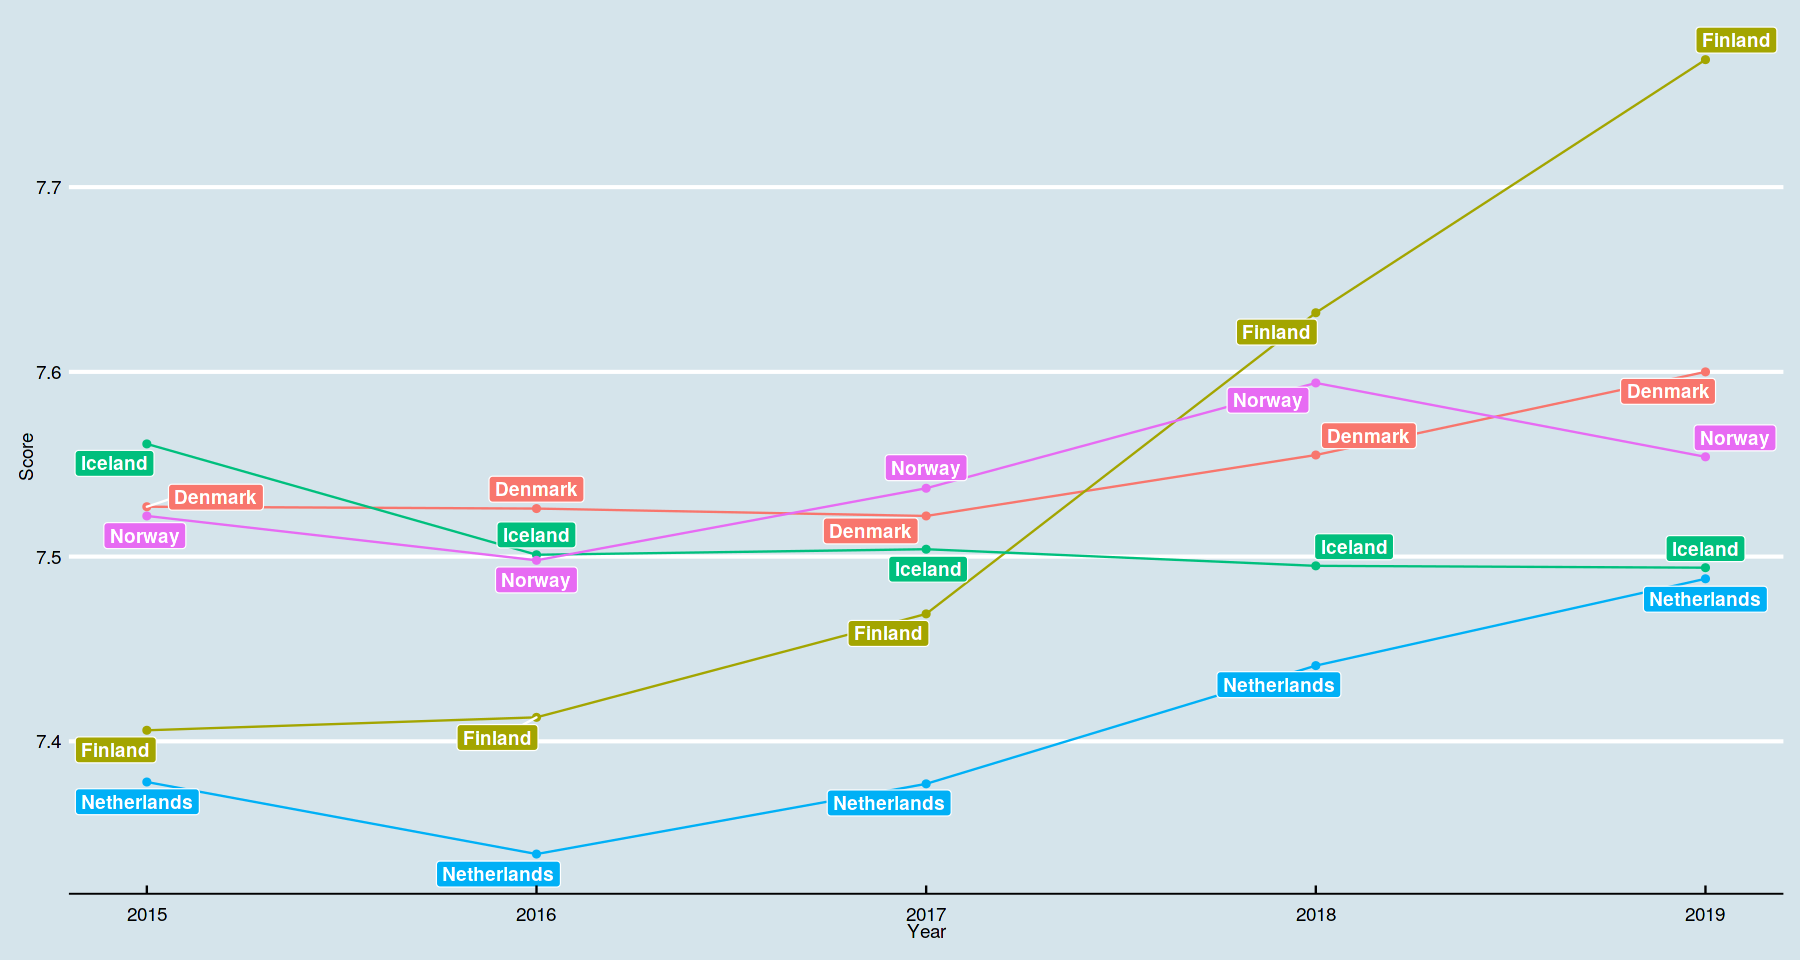

In [48]:
# For the plots size
options(repr.plot.width = 15, repr.plot.height = 8)
library(ggthemes)
ggplot(union_happiest_countries , aes(x=Year, y= Score)) +
    geom_line(aes(color = union_happiest_countries$`Country or region`)) +
    geom_point(aes(color = union_happiest_countries$`Country or region`))+ 
    geom_label_repel(aes(label = union_happiest_countries$`Country or region`, fill = union_happiest_countries$`Country or region`),
                    color = "white", fontface = "bold")+
    theme_economist() + 
    scale_color_discrete(name = "Country: ") +
    guides(color = guide_legend(override.aes = list(size = 6)))+
    theme(legend.position = "none")

___

As we can see, Finland was place number 4 in 2015, and after 4 years, it is the happiest country in 2019. Could it be related to specific variable such as GDP, Social Support or Life Expectancy?

In [49]:
Finland <- union_happiest_countries[union_happiest_countries$`Country or region` == "Finland",]


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggthemes’:

    theme_map




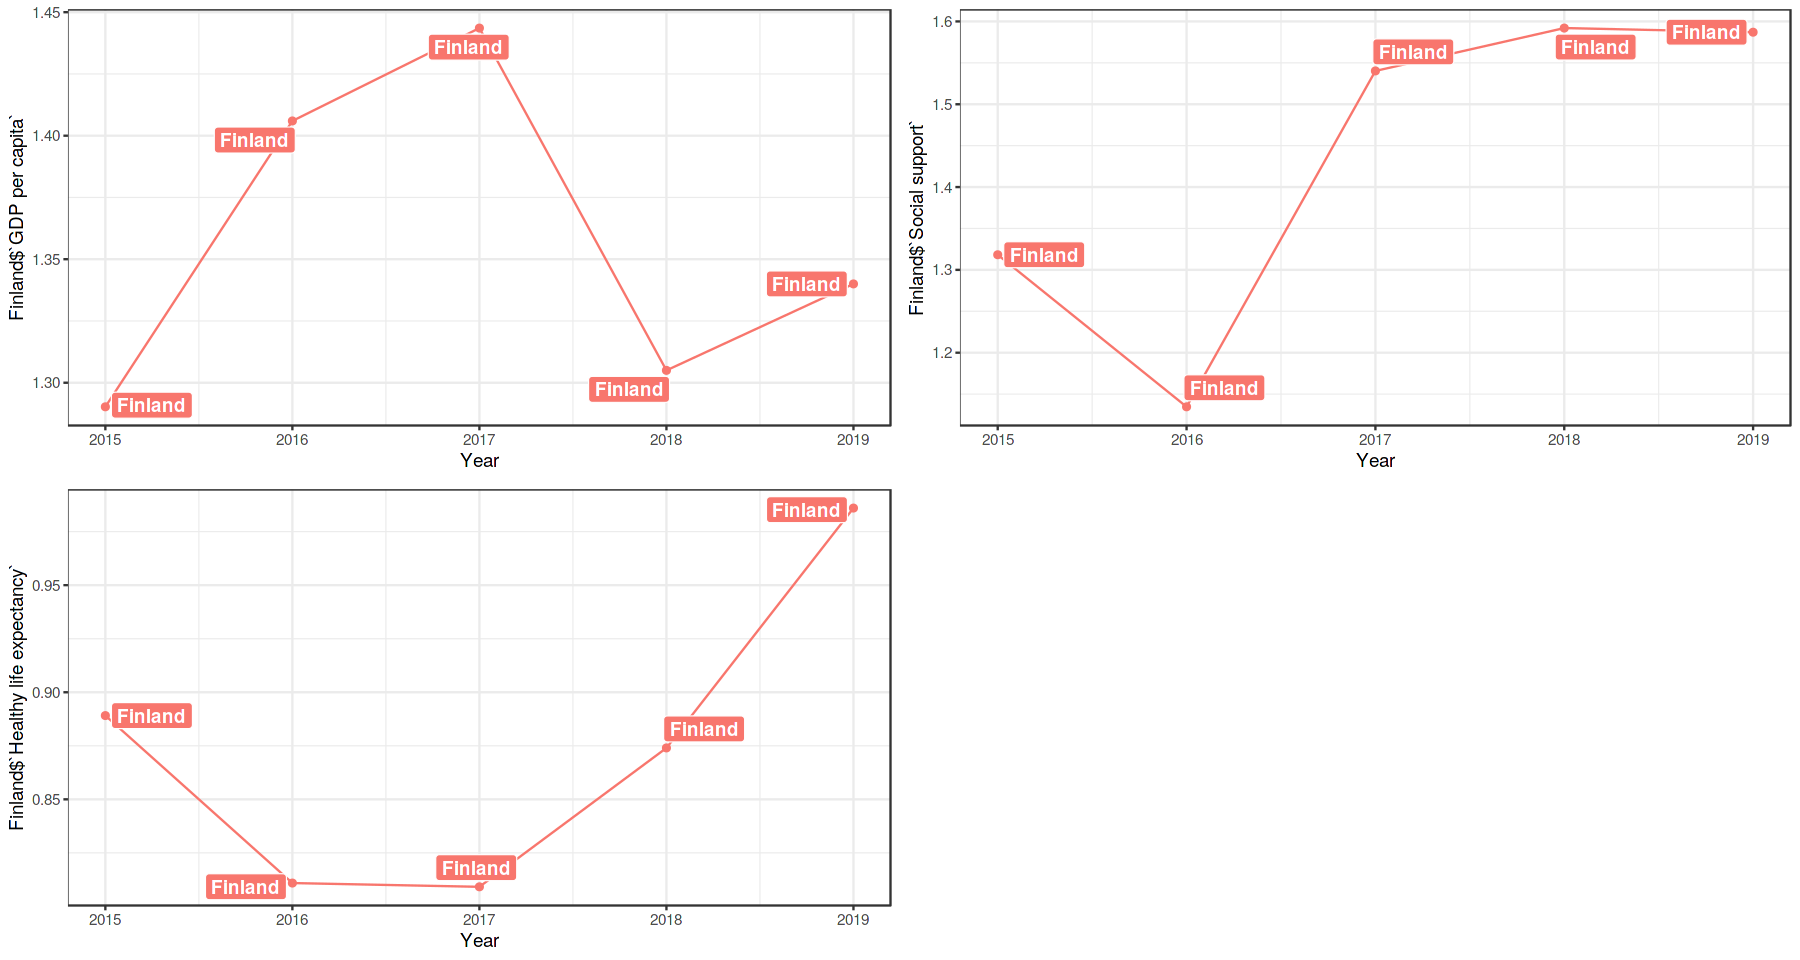

In [50]:
library(cowplot) ## To show different plots in one view
Finland_GDP <- ggplot(Finland , aes(x=Year, y= Finland$`GDP per capita`)) +
    geom_line(aes(color = Finland$`Country or region`)) +
    geom_point(aes(color = Finland$`Country or region`))+ 
    geom_label_repel(aes(label = Finland$`Country or region`, fill = Finland$`Country or region`),
                    color = "white", fontface = "bold")+
    theme_bw() + 
    scale_color_discrete(name = "Country: ") +
    guides(color = guide_legend(override.aes = list(size = 6)))+
    theme(legend.position = "none")

Finland_SS <- ggplot(Finland , aes(x=Year, y= Finland$`Social support`)) +
    geom_line(aes(color = Finland$`Country or region`)) +
    geom_point(aes(color = Finland$`Country or region`))+ 
    geom_label_repel(aes(label = Finland$`Country or region`, fill = Finland$`Country or region`),
                    color = "white", fontface = "bold")+
    theme_bw() + 
    scale_color_discrete(name = "Country: ") +
    guides(color = guide_legend(override.aes = list(size = 6)))+
    theme(legend.position = "none")

Finland_LE <- ggplot(Finland , aes(x=Year, y= Finland$`Healthy life expectancy`)) +
    geom_line(aes(color = Finland$`Country or region`)) +
    geom_point(aes(color = Finland$`Country or region`))+ 
    geom_label_repel(aes(label = Finland$`Country or region`, fill = Finland$`Country or region`),
                    color = "white", fontface = "bold")+
    theme_bw() + 
    scale_color_discrete(name = "Country: ") +
    guides(color = guide_legend(override.aes = list(size = 6)))+
    theme(legend.position = "none")
plot_grid(Finland_GDP, Finland_SS, Finland_LE)


___

What we see here it is interesting because, despite the correlation showed before among Happiness Score with Social Support, GDP or Life Expectancy, we could not say that Finland is the happiest countries in 2019 and it was not some years ago because some of these factors. 

**It will need further investigation to determine what was the key factor(s) that moved Finland to the happiest country in 2019.**

# Clustering Map Analysis
___

Once we have created 4 clusters, we are going to represent them in a World Map to see the four groups of countries based on the 2019 Happiness Score.

In [51]:
# Create a Map showing the Countries grouped by Cluster

library(ggplot2)
require(maps)

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:cluster’:

    votes.repub


The following object is masked from ‘package:purrr’:

    map




We obtain the long and lat data from each country using the maps library

In [52]:
world_map <- map_data("world") 
head(world_map,3)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-69.89912,12.45200,1,1,Aruba,NA
2,-69.89571,12.42300,1,2,Aruba,NA
3,-69.94219,12.43853,1,3,Aruba,NA


What we will do now, it is unify the world_map dataset with the data that we have in countries1. To do so, we will need to match all the countries names in both datasets.

In [53]:
countries_by_cluster <- countries1[,c("Country or region", "cluster")]
countries_by_cluster$cluster <- as.numeric(countries_by_cluster$cluster)
# Left Join
clustering_map <- left_join(countries_by_cluster, world_map, by = c("Country or region"  = "region"), keep = TRUE)

We can see that there are countries without the long and lat values. This is because it did not work the join. We will rename this countries.

In [54]:
# Unique Countries in World Map Dataset
d_countries <- distinct(world_map, region)

In [55]:
# We replace the NA values found in the Left Join
countries_by_cluster[clustering_map[is.na(clustering_map[,"region"]),1],1]  = c("UK","USA","Tobago","Cyprus","Japan","Macedonia","Republic of Congo","Palestine",
                                                                                "Republic of Congo")

In [56]:
# We do (again) the left join
# Left Join
clustering_map <- left_join(countries_by_cluster, world_map, by = c("Country or region"  = "region"), keep = TRUE)

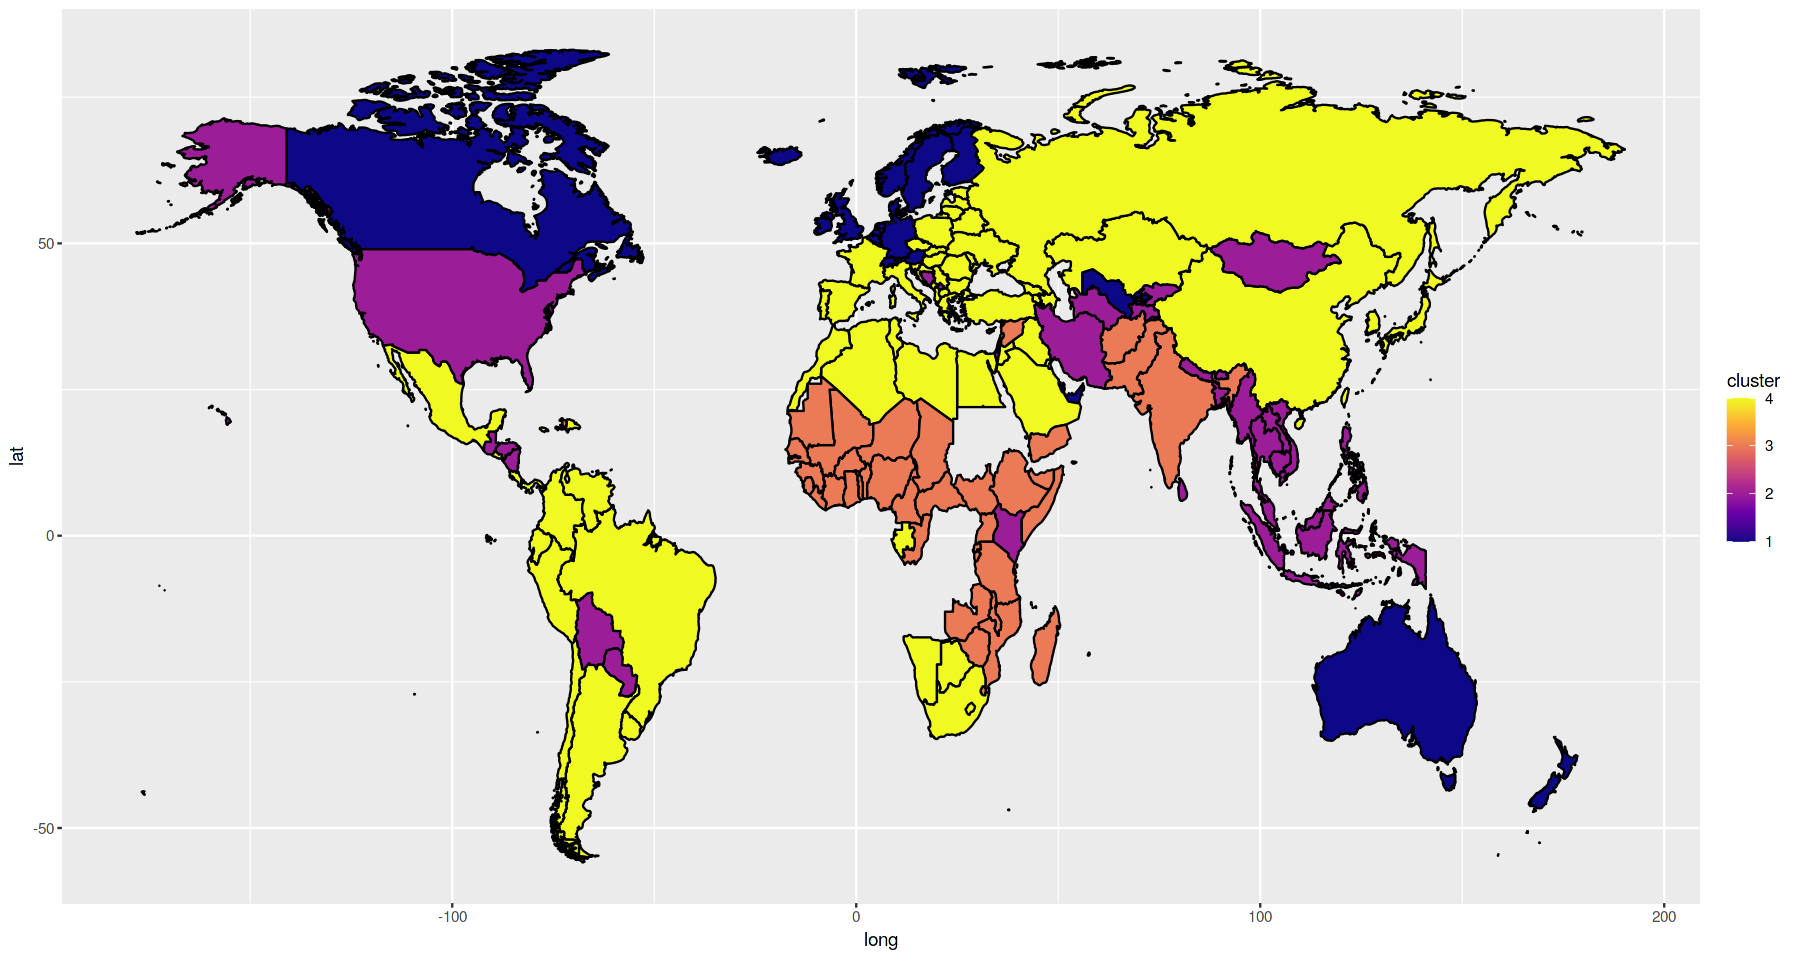

In [57]:
# Map with the Clusters
ggplot(clustering_map, aes(long, lat, group = group))+
  geom_polygon(aes(fill = cluster), color = 1)+
  scale_fill_viridis_c(option = "C")

In [58]:
# HAPPIEST COUNTRIES (CLUSTER 1)

countries_by_cluster[countries_by_cluster$cluster == 1,1]

[1] "Finland"              "Denmark"              "Norway"              
 [4] "Iceland"              "Netherlands"          "Switzerland"         
 [7] "Sweden"               "New Zealand"          "Canada"              
[10] "Austria"              "Australia"            "Luxembourg"          
[13] "UK"                   "Ireland"              "Germany"             
[16] "Belgium"              "United Arab Emirates" "Malta"               
[19] "Qatar"                "Singapore"            "Uzbekistan"          
[22] "Japan"

In [59]:
#  LEAST HAPPY COUNTRIES (CLUSTER 3)

countries_by_cluster[countries_by_cluster$cluster == 3,1]

[1] "Pakistan"                 "Nigeria"                 
 [3] "Cameroon"                 "Ghana"                   
 [5] "Ivory Coast"              "Benin"                   
 [7] "Republic of Congo"        "Senegal"                 
 [9] "Somalia"                  "Niger"                   
[11] "Burkina Faso"             "Guinea"                  
[13] "Gambia"                   "Mauritania"              
[15] "Mozambique"               "Republic of Congo"       
[17] "Mali"                     "Sierra Leone"            
[19] "Chad"                     "Ethiopia"                
[21] "Swaziland"                "Uganda"                  
[23] "Zambia"                   "Togo"                    
[25] "India"                    "Liberia"                 
[27] "Comoros"                  "Madagascar"              
[29] "Lesotho"                  "Burundi"                 
[31] "Zimbabwe"                 "Haiti"                   
[33] "Syria"                    "Malawi"                  
[35] "Yemen"                    "Rwanda"                  
[37] "Tanzania"                 "Afghanistan"             
[39] "Central African Republic" "South Sudan"

# CONCLUSIONS

- The **Correlation Analysis** shows that the main variables associated with the Happiness Score are GDP per capita, Social Support & Life Expectancy. On the other hand, Generosity is not related with the score in this analysis. However, we will need further investigation.
- The **PCA & Cluster Analysis** shows that the happiest countries are situated in different places. However, all of them have good quality of Life (North European Countries, Canada, Australia, etc.) 
- Furthermore, we can see in the ggparcoord that the differences are situated in the variables mentioned before. **Variables such as Freedom, Generosity and Corruption have mean score values similar among clusters**.

*Any feedback is welcome!*